In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import neighbors
from math import sqrt
import joblib

from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder # import

import joblib
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\hites\Downloads\weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.shape

(8425, 23)

We can observe that we have 8425 rows and 23 columns in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

We can see obsesrve thatthe dataset have both object and float datatypes.

date is in the object dtypes but we have to convert into datetime.

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Sunshine                 3994       47.406528
Evaporation              3512       41.685460
Cloud3pm                 2455       29.139466
Cloud9am                 2421       28.735905
Pressure3pm              1312       15.572700
Pressure9am              1309       15.537092
WindGustDir               991       11.762611
WindGustSpeed             991       11.762611
WindDir9am                829        9.839763
WindDir3pm                308        3.655786
RainToday                 240        2.848665
Rainfall                  240        2.848665
RainTomorrow              239        2.836795
WindSpeed3pm              107        1.270030
Humidity3pm               102        1.210682
Temp3pm                    96        1.139466
WindSpeed9am               76        0.902077
MinTemp                    75        0.890208
MaxTemp                    60        0.712166
Humidity9am                59        0.700297
Temp9am                    56     

Observation:
    
 The dataset makes it clearly evident that nearly every features, with the exception of the date and location, has null values, as do the target values.sunshine and Evaporation have almost 47% and 41% of missing data.



In [7]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,16
WindGustSpeed,52
WindDir9am,16


It is evident to us from the From analyzing these various types, we may conclude that one of our target variables, "RainTomorrow," is a classification problem since it contains two classes and predicts tomorrow's rainfall, while the other target, "Rainfall," is a regression problem because it is continuous data.

In [8]:
df.isin([' ','NA','-']).sum().any()

False

In [9]:
df.duplicated().sum()

1663

As we observe that there are 1663 duplicate values are present in dataset.

In [10]:
df.drop_duplicates(keep='last', inplace=True)

In [11]:
df.isin([' ?']).sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [12]:
df.shape

(6762, 23)

In [13]:
#Now check the value count of each and every column

for i in df.columns:
    value_counts = df[i].value_counts()
    print(f"Value counts for {i}:\n{value_counts}\n")

Value counts for Date:
2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
             ..
2016-11-03    1
2016-11-02    1
2016-11-01    1
2016-10-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64

Value counts for Location:
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64

Value counts for MinTemp:
13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: MinTemp, Length: 285, dtype: int64

Value counts for MaxTemp:
19.0    66
19.8    62
20.8    54
23.8    54
25.0    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64

Value counts for Rainfall:
0.0      4334
0.2       321
0.4       144
0.6  

As we can observe that the value counts of the target variable "rain tomorrow" is unbalanced; we will utilize SMOTE for balancing the data.

In [14]:
# Converting Date columns from object type into datetime data type
df['Date']=pd.to_datetime(df['Date'])

In [15]:
# Extracting Day, Month and Year column from Date
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [16]:
df.drop(columns=['Date'],axis=1,inplace=True)

In [17]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


In [18]:
df.isnull().sum()

Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
Day                 0
Month               0
Year                0
dtype: int64

# Filling Null Values

In [19]:
#Filling null values in MinTemp with it's mean
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

#Filling null values in MaxTemp with it's mean
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

#Fillinf null values in Rainfall with it's mode, as most of the rows have 0 rainfall.
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])

#Filling null values in Evaporation with it's mean
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

#Filling null values in Sunshine with it's mean
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

#Filling null values in WindGustDir with it's mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])

#Filling null values in WindGustSpeed with it's mean
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())

#Filling null values in WindDir9am with it's mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])

#Filling null values in WindDir3pm with it's mode
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

#Filling null values in WindSpeed9am with it's mean
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())

#Filling null values in WindSpeed3pm with it's mean
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())

#Filling null values in Humidity9am with it's mean
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

#Filling null values in Humidity3pm with it's mean
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

#Filling null values in Pressure9am with it's mean
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

#Filling null values in Pressure3pm with it's mean
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

#Filling null values in Cloud9am with it's mean
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

#Filling null values in Cloud3pm with it's mean
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

#Filling null values in Temp9am with it's mean
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in Temp3pm with it's mean
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

#Filling null values in RainToday with it's mode
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

#Filling null values in RainTomorrow with it's mode
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [20]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

<AxesSubplot:>

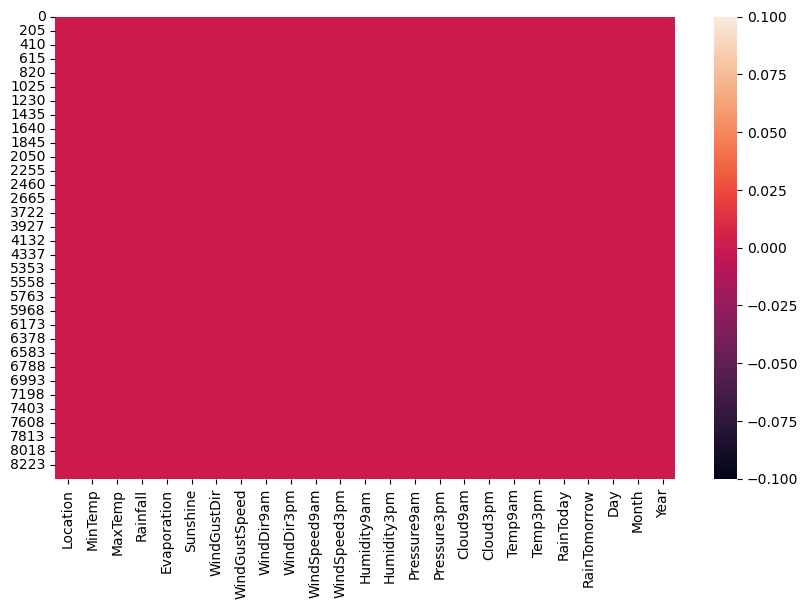

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

Now there is no missing value present in the dataset

In [22]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.109145,24.098345,2.723410,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561,15.737208,6.462141,2012.052203
std,5.540667,6.130123,10.490138,3.343713,2.733639,13.376457,9.787577,9.548634,17.182700,18.498341,6.027914,5.967638,2.474649,2.323276,5.722411,5.971845,8.793898,3.377471,2.301057
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.000000,19.600000,0.000000,4.000000,7.890896,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000,8.000000,4.000000,2010.000000
50%,13.109145,23.500000,0.000000,5.302395,7.890896,38.977663,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.300000,16.000000,6.000000,2012.000000
75%,17.400000,28.400000,0.800000,5.302395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


Observation:

Count: Indicates the number of non-null values in each column. It seems that there are 8425 observations for each column.

The Rainfall column has a wide range, with a maximum value of 371. This suggests the presence of outliers that may need to be addressed.

The Evaporation, Sunshine, WindGustSpeed, and other columns also have varying ranges and standard deviations, indicating potential variability in the data.\

Some columns, such as Cloud9am and Cloud3pm, seem to have a discrete scale (possibly representing cloud cover) based on the presence of integer values.

# Sererate the numical and categorical column.

In [23]:
categorial_col = []
for i in df.dtypes.index:
    if df.dtypes[i]  == "object":
        categorial_col.append(i)
print("Categorial Columns: " , categorial_col)  
print("\n")



numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: " , numerical_col)

Categorial Columns:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Numerical Columns:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


# Exploratory Data Analysis (EDA) 

In [24]:
#Lets Start with the target variable "RainTomorrow"

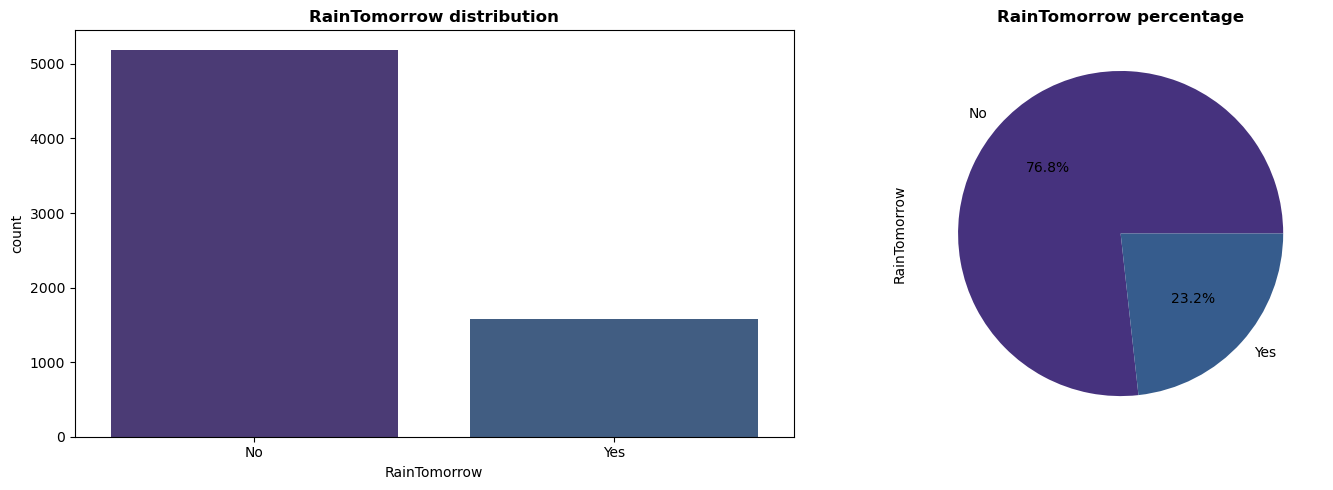

In [25]:
# Set the figure layout to avoid clipping
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('viridis')

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
count_plot = sns.countplot(x='RainTomorrow', data=df, ax=axes[0])
axes[0].set_title('RainTomorrow distribution', fontweight='bold')


# Pie plot
df['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('RainTomorrow percentage', fontweight='bold')

# Show the plots
plt.show()

Form the above observation we can see that only 23.2% of chances there may be rain tommrow.

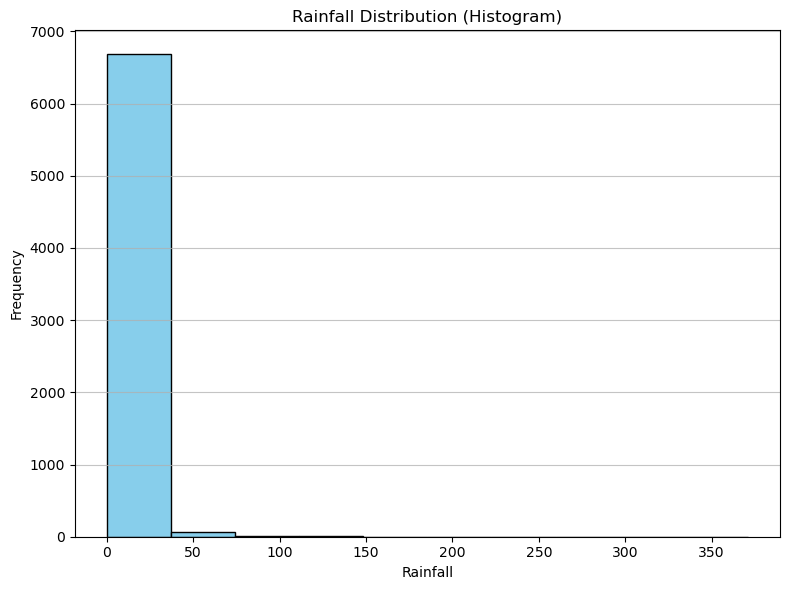

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(df['Rainfall'], bins=10, color='skyblue', edgecolor='black')
plt.title('Rainfall Distribution (Histogram)')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

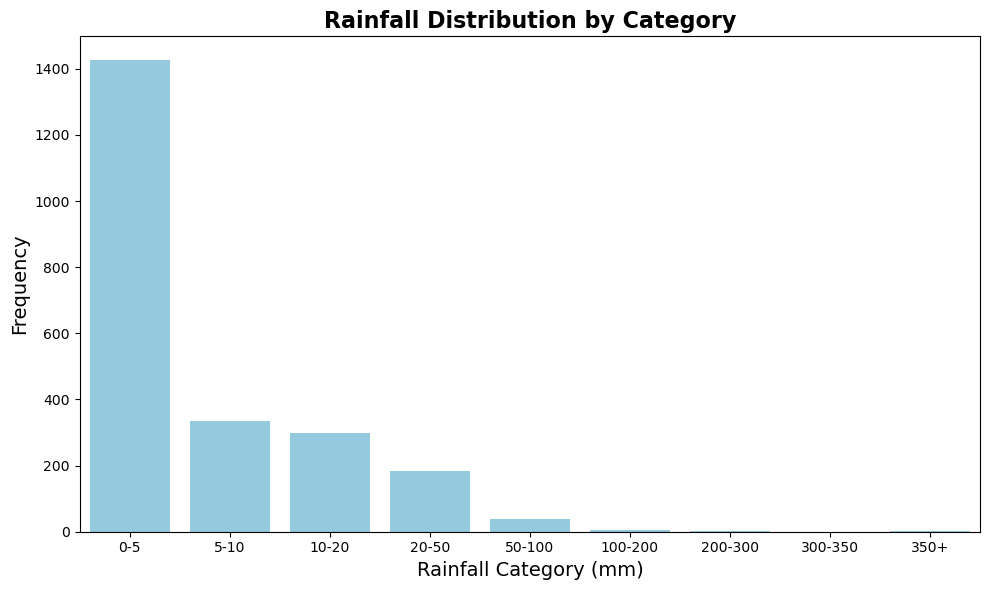

In [27]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('viridis')

# Create bins for rainfall
bins = [0, 5, 10, 20, 50, 100, 200, 300, 350, 350+ float('inf')]  # Define your own bin edges as needed

# Create a new column 'Rainfall_Category' based on the bins
df['Rainfall_Category'] = pd.cut(df['Rainfall'], bins=bins, labels=['0-5', '5-10', '10-20', '20-50', '50-100', '100-200', '200-300', '300-350', '350+'])

# Count the occurrences in each category
rainfall_counts = df['Rainfall_Category'].value_counts().sort_index()

# Create a bar plot for rainfall distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=rainfall_counts.index, y=rainfall_counts.values, color='skyblue')

# Set plot title and labels
plt.title('Rainfall Distribution by Category', fontsize=16, fontweight='bold')
plt.xlabel('Rainfall Category (mm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

Observation:
    
maximum raindall range between 0-5mm.

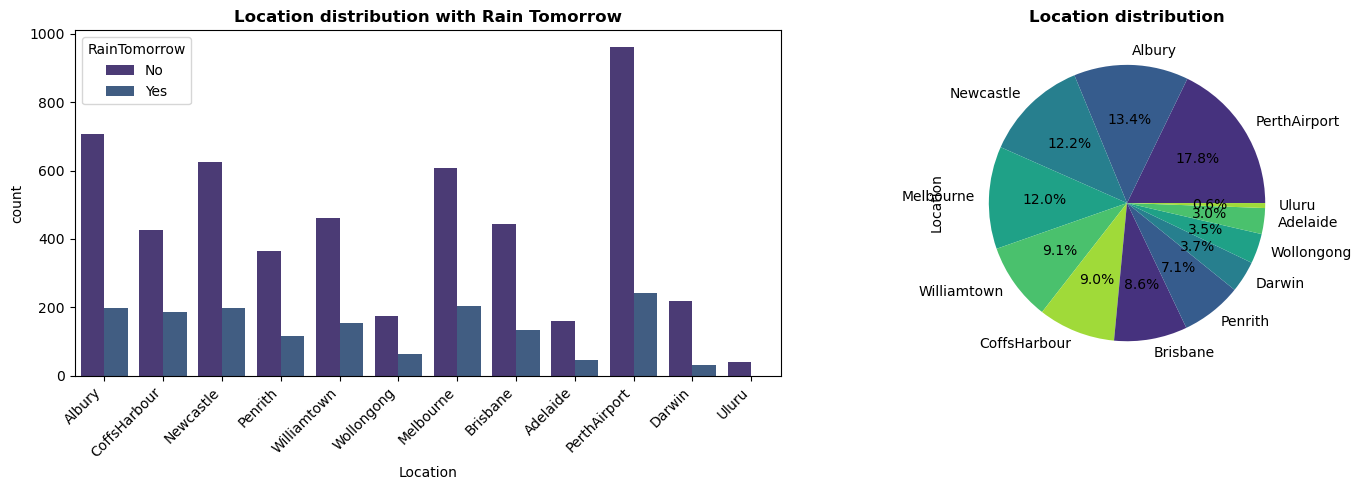

In [28]:
# Set the figure layout to avoid clipping
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('viridis')

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot with hue
count_plot = sns.countplot(x='Location', hue='RainTomorrow', data=df, ax=axes[0])
axes[0].set_title('Location distribution with Rain Tomorrow', fontweight='bold')
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45, ha='right')

# Pie plot
df['Location'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Location distribution', fontweight='bold')

# Show the plots
plt.show()

Observation:
    
As we observe that perthairport share most of the rain with 19.3% and chances of Rain Tommrow in coffsHarbour is most than others.


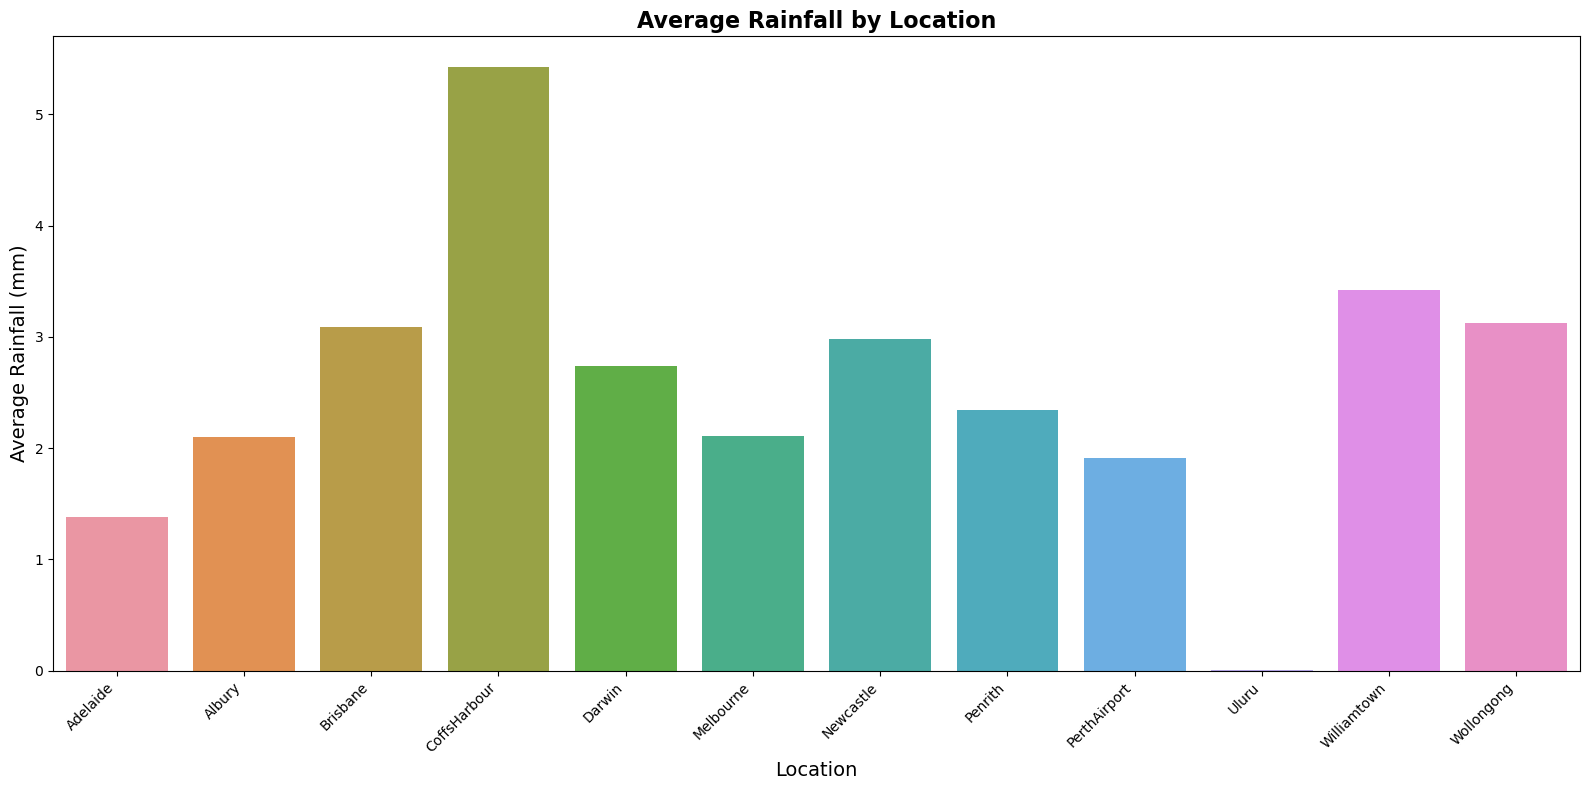

In [29]:
# Set the figure layout to avoid clipping
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('viridis')

# Create a bar plot for average rainfall by location
plt.figure(figsize=(16, 8))
sns.barplot(x='Location', y='Rainfall', data=df.groupby('Location')['Rainfall'].mean().reset_index())
plt.title('Average Rainfall by Location', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Rainfall (mm)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Averave rainfall is highest in city coffsHarbour as compare to the others more then 5.5mm

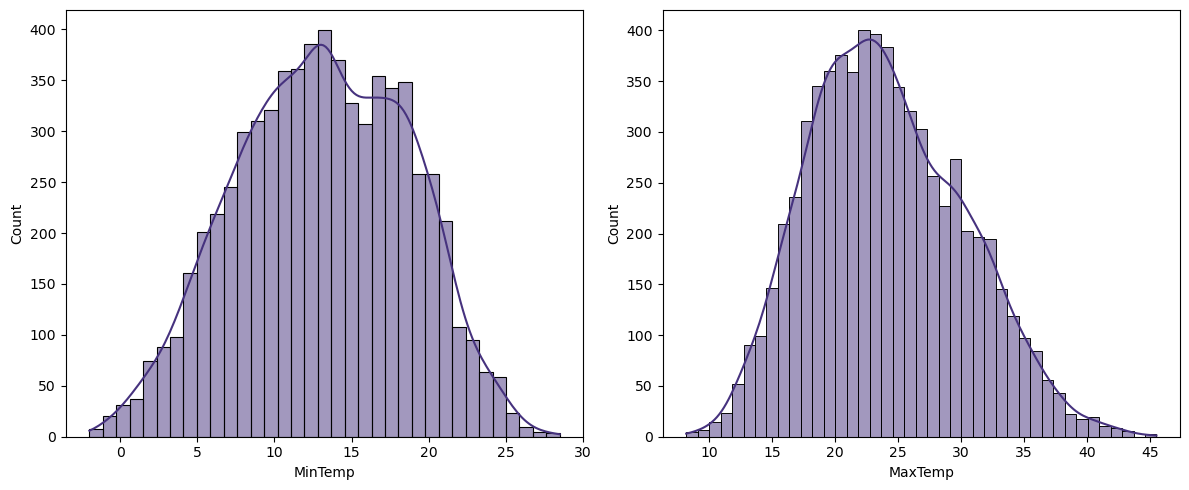

In [30]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['MinTemp'],kde=True,)
plt.subplot(1,2,2)
sns.histplot(df['MaxTemp'],kde=True)
plt.show()

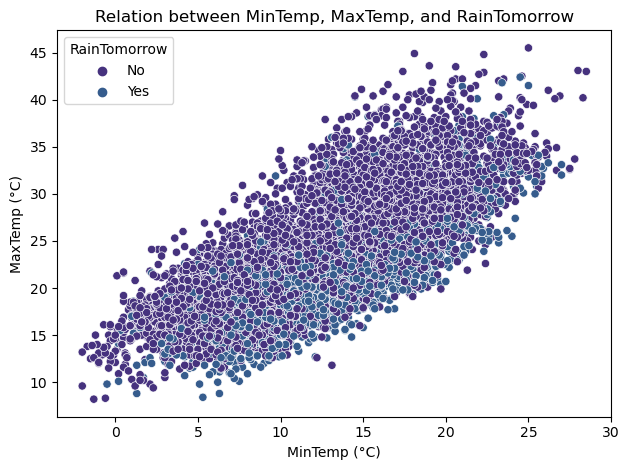

In [32]:


sns.scatterplot(x='MinTemp', y='MaxTemp', hue='RainTomorrow', data=df)
plt.title('Relation between MinTemp, MaxTemp, and RainTomorrow')
plt.xlabel('MinTemp (°C)')
plt.ylabel('MaxTemp (°C)')
plt.legend(title='RainTomorrow')
plt.show()


From the above observation we can say that min temp between 5 and maximum temp 25 there is high chances of rain tommrow.

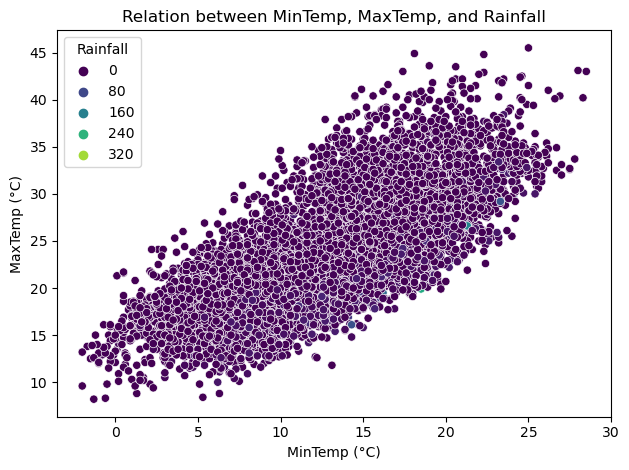

In [33]:
sns.scatterplot(x='MinTemp', y='MaxTemp', hue='Rainfall', data=df, palette='viridis')
plt.title('Relation between MinTemp, MaxTemp, and Rainfall')
plt.xlabel('MinTemp (°C)')
plt.ylabel('MaxTemp (°C)')
plt.legend(title='Rainfall')
plt.show()


There is chances of high rainfall when temperature is between 15-40 degree.

moderate rainfall falls between 5-20 degree of temperature.

In [34]:
df.groupby('Year')['Rainfall'].mean()

Year
2008    2.380645
2009    3.277895
2010    2.984045
2011    2.470962
2012    2.634932
2013    2.310681
2014    1.898123
2015    3.261724
2016    3.134153
2017    3.328372
Name: Rainfall, dtype: float64

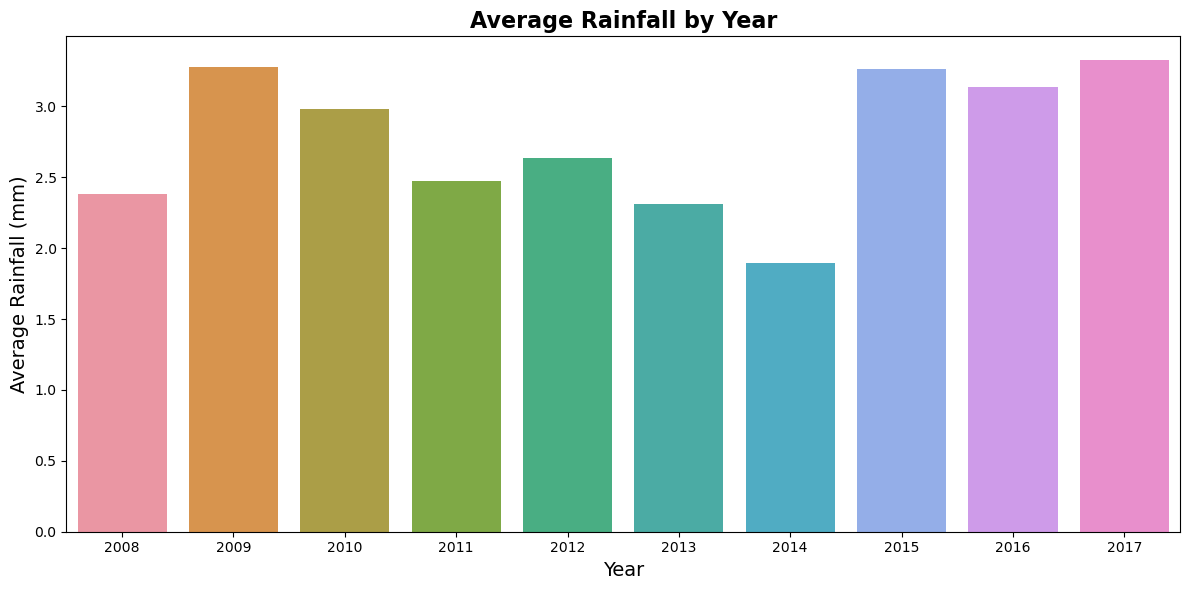

In [35]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('viridis')

# Create a bar plot for average rainfall by year
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Rainfall', data=df.groupby('Year')['Rainfall'].mean().reset_index())
plt.title('Average Rainfall by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rainfall (mm)', fontsize=14)
plt.show()

Observation:
    
Based on the observations above, we can conclude that 2009 & 2017 have the highest average rainfall of more than 3.5mm.

In 2014, the average rainfall was the lowest.

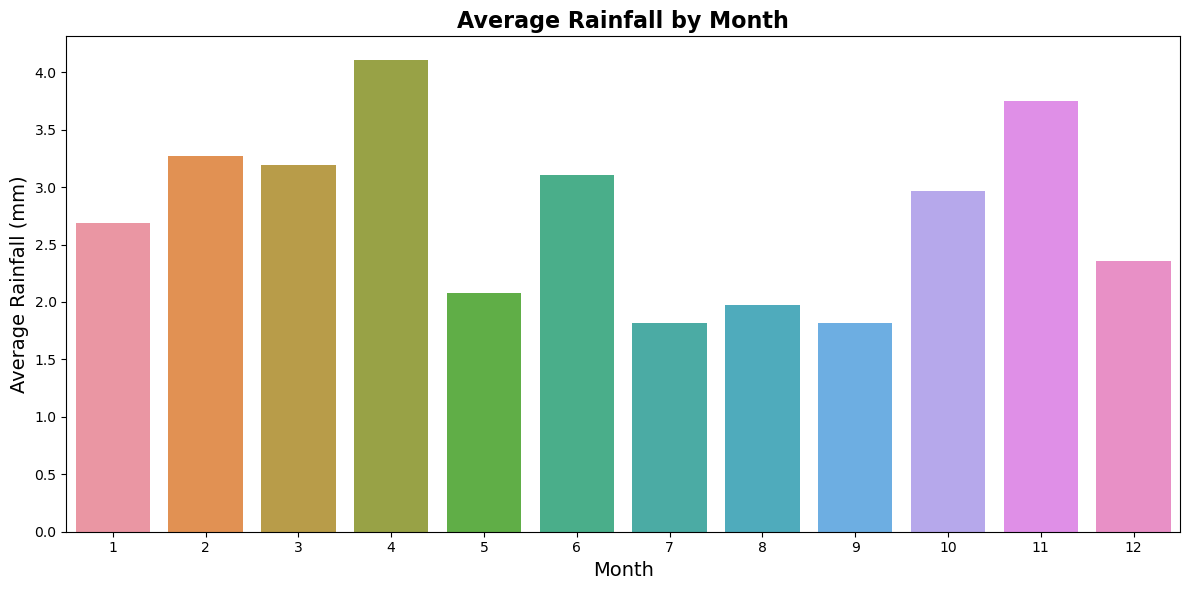

In [36]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('viridis')



# Create a bar plot for average rainfall by month
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Rainfall', data=df.groupby('Month')['Rainfall'].mean().reset_index())
plt.title('Average Rainfall by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Rainfall (mm)', fontsize=14)

plt.show()

Based on the observations above, we can conclude that the average rainfall in April is higher than in previous months, with an average of 4mm in April.

Rainfall averages 3-3.5mm in February, March, October, and November.

The average rainfall in July is around 1.75mm is the lowest.

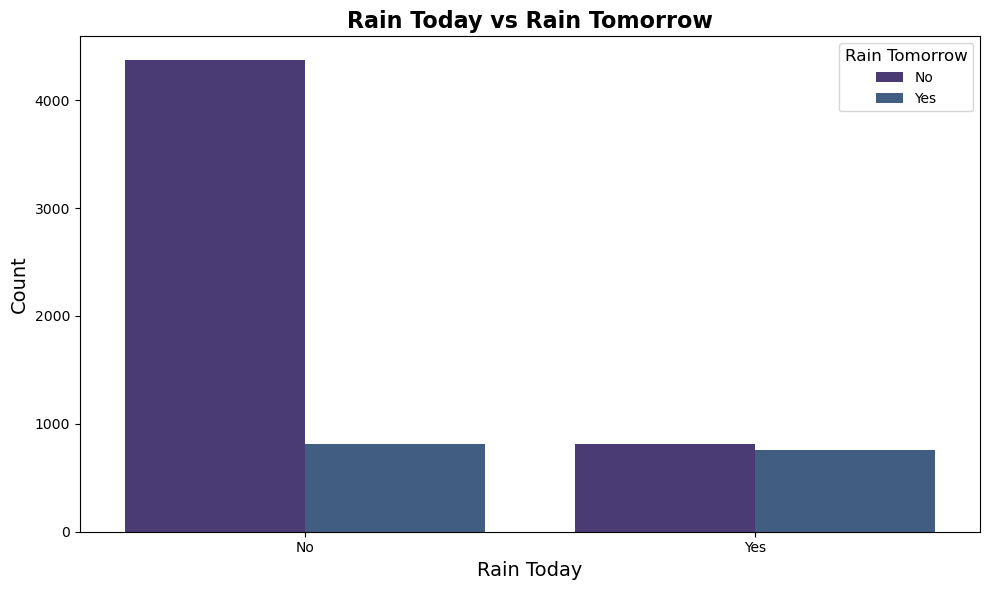

In [37]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('viridis')

# Create a count plot for RainToday and RainTomorrow
plt.figure(figsize=(10, 6))
sns.countplot(x='RainToday', hue='RainTomorrow', data=df)
plt.title('Rain Today vs Rain Tomorrow', fontsize=16, fontweight='bold')
plt.xlabel('Rain Today', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Rain Tomorrow', title_fontsize='12')
plt.show()

Observation:
    
  From the above observatiion we can say that If it rains today, there is a good probability it will rain tomorrow.

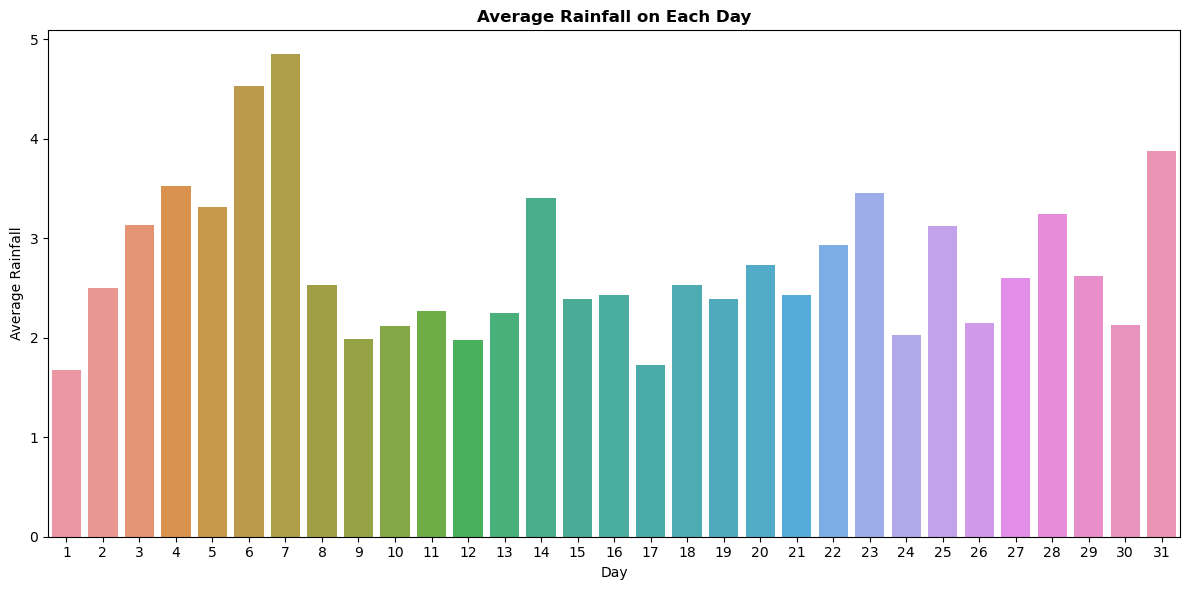

In [38]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('viridis')

# Create a bar plot for average rainfall on each day
plt.figure(figsize=(12, 6))
sns.barplot(x='Day', y='Rainfall', data=df, ci=None)
plt.title('Average Rainfall on Each Day', fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Average Rainfall')
plt.show()


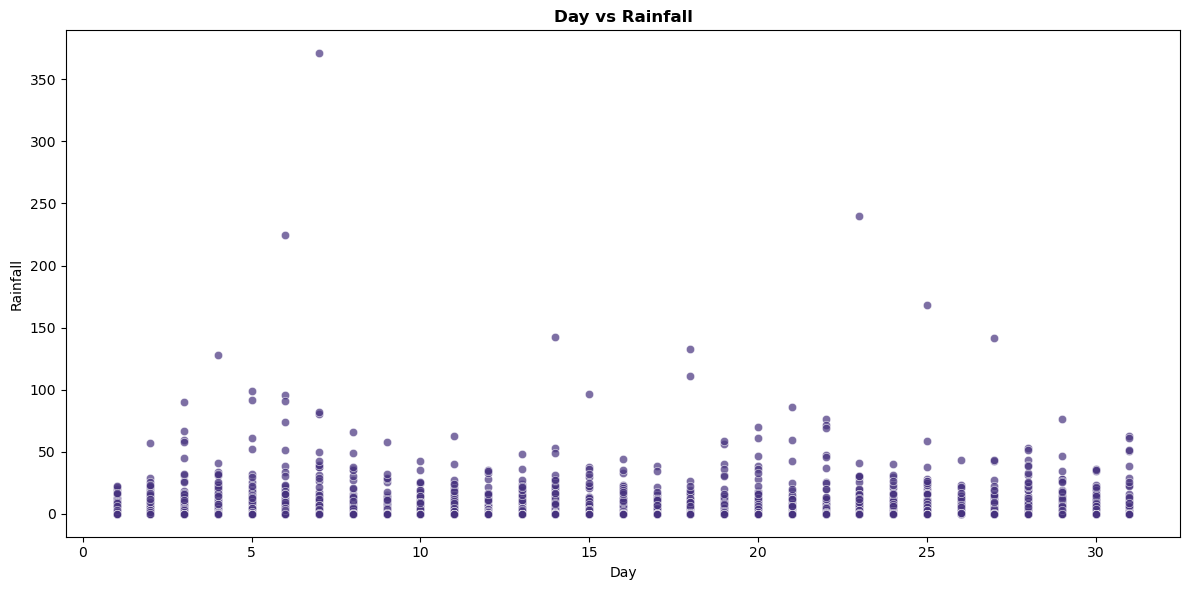

In [39]:
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('viridis')

# Create scatter plot for Day vs Rainfall
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Day', y='Rainfall', data=df, palette='viridis', alpha=0.7)
plt.title('Day vs Rainfall', fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Rainfall')
plt.show()

Observation:

From the above observation we can say that the average amountof rainfall is on 7th day the month is about 4.75mm

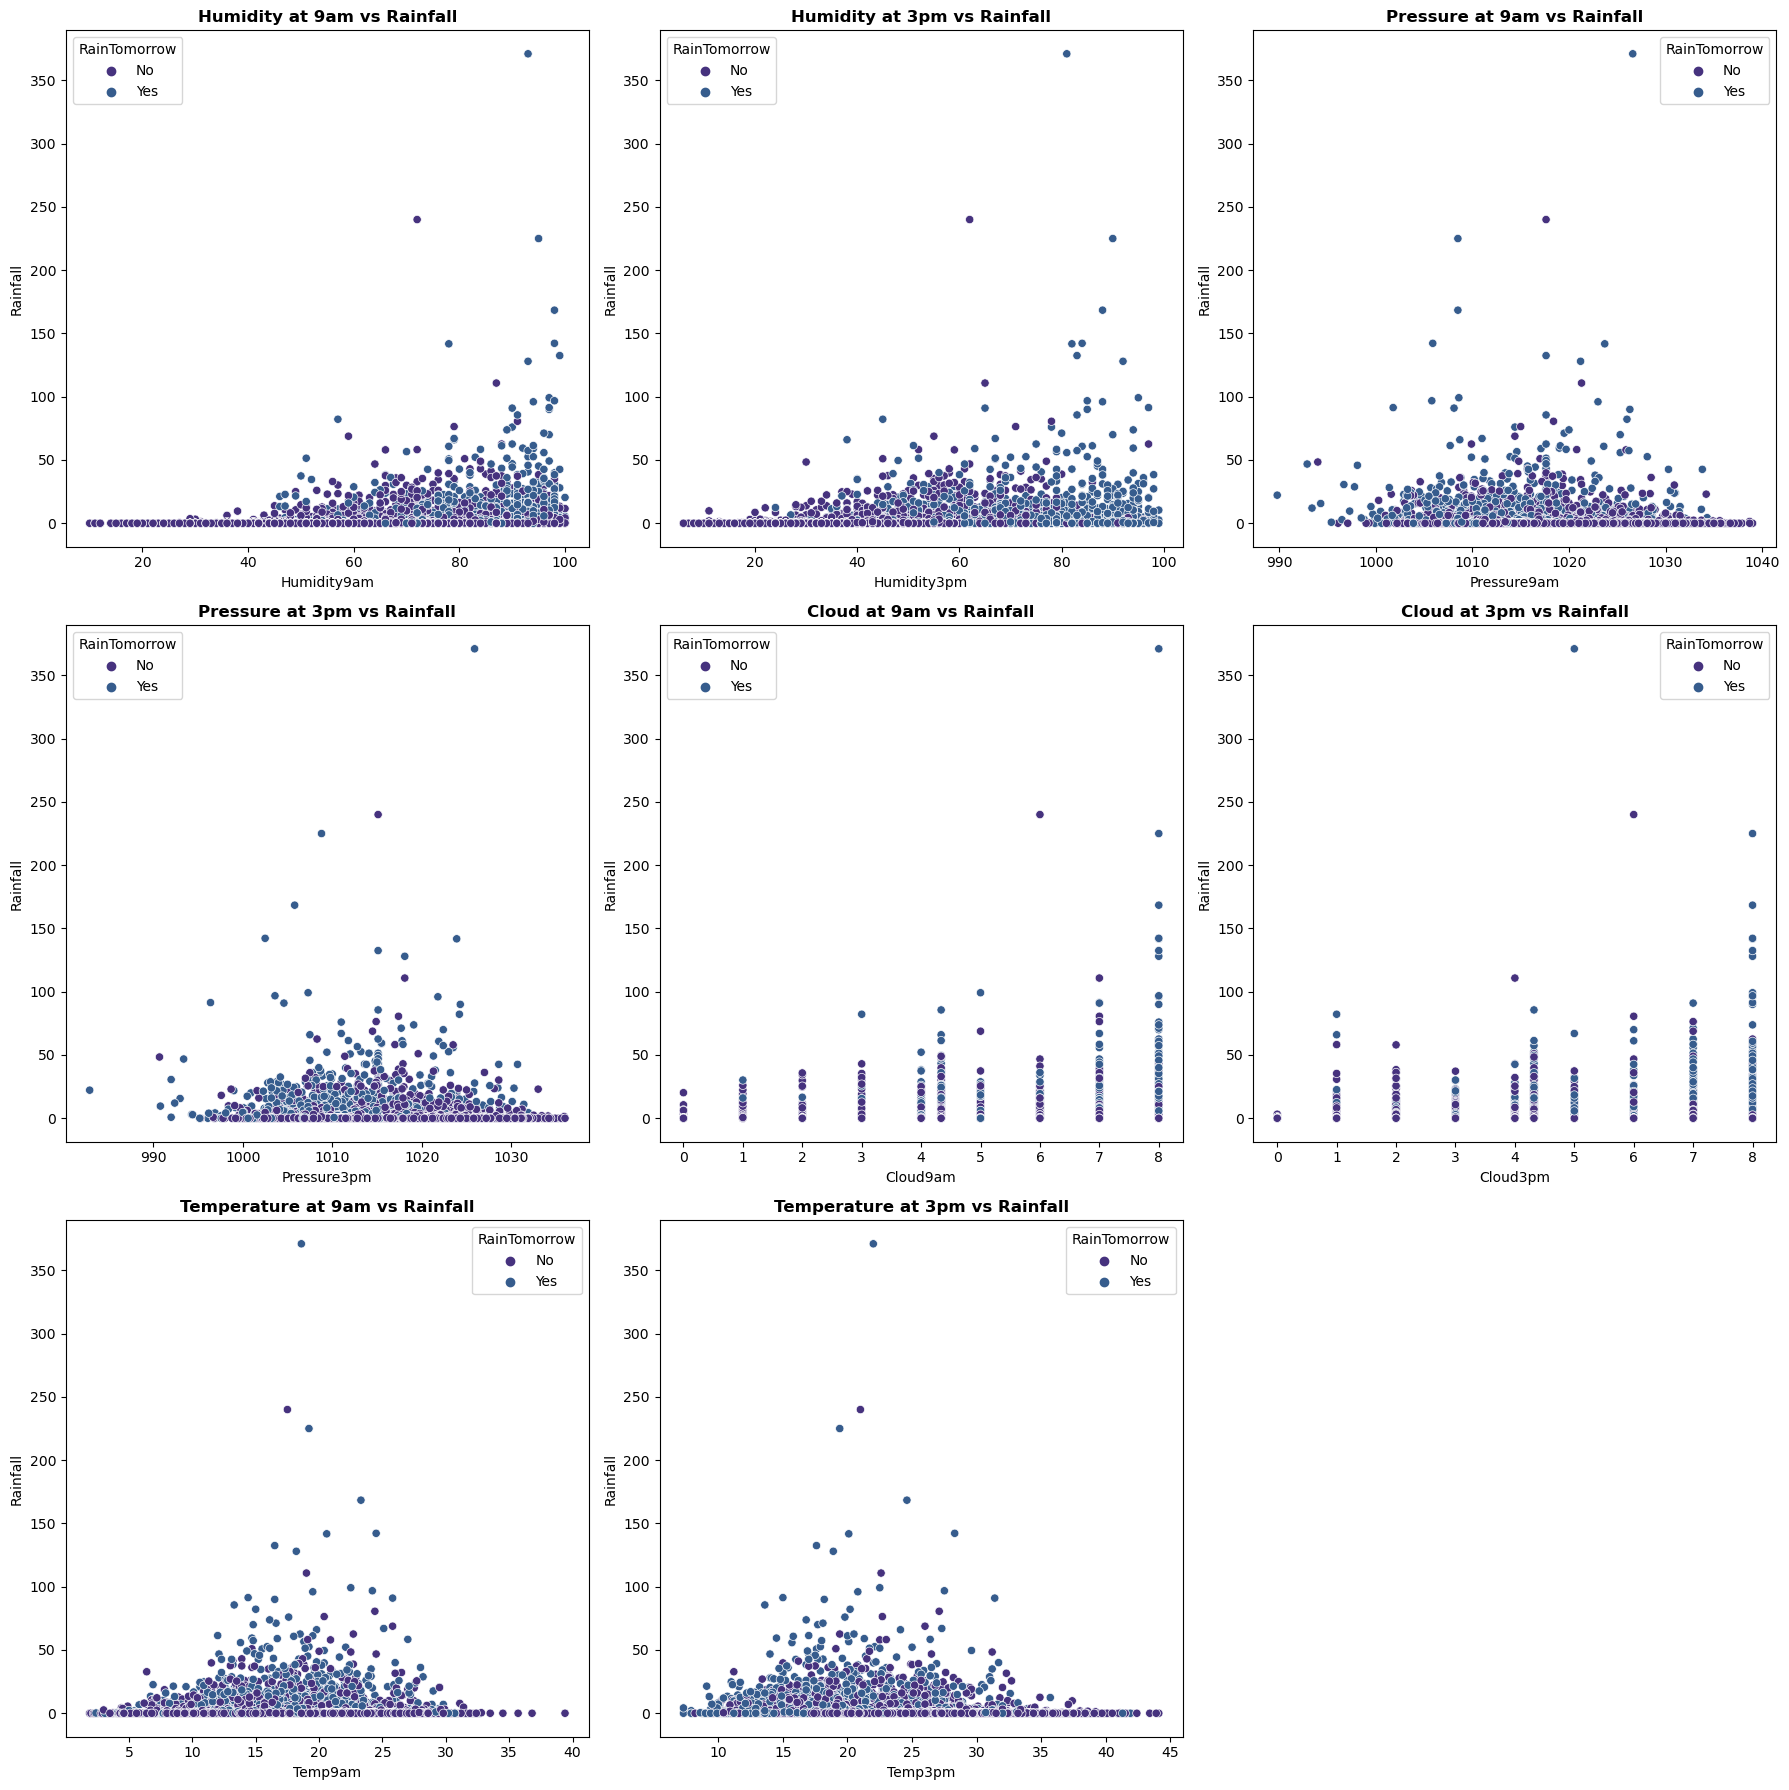

In [40]:
# Set the figure layout to avoid clipping
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('viridis')

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Scatter plot for Humidity9am vs Rainfall
sns.scatterplot(x='Humidity9am', y='Rainfall', hue='RainTomorrow', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Humidity at 9am vs Rainfall', fontweight='bold')

# Scatter plot for Humidity3pm vs Rainfall
sns.scatterplot(x='Humidity3pm', y='Rainfall', hue='RainTomorrow', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Humidity at 3pm vs Rainfall', fontweight='bold')

# Scatter plot for Pressure9am vs Rainfall
sns.scatterplot(x='Pressure9am', y='Rainfall', hue='RainTomorrow', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Pressure at 9am vs Rainfall', fontweight='bold')

# Scatter plot for Pressure3pm vs Rainfall
sns.scatterplot(x='Pressure3pm', y='Rainfall', hue='RainTomorrow', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Pressure at 3pm vs Rainfall', fontweight='bold')

# Scatter plot for Cloud9am vs Rainfall
sns.scatterplot(x='Cloud9am', y='Rainfall', hue='RainTomorrow', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Cloud at 9am vs Rainfall', fontweight='bold')

# Scatter plot for Cloud3pm vs Rainfall
sns.scatterplot(x='Cloud3pm', y='Rainfall', hue='RainTomorrow', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Cloud at 3pm vs Rainfall', fontweight='bold')

# Scatter plot for Temp9am vs Rainfall
sns.scatterplot(x='Temp9am', y='Rainfall', hue='RainTomorrow', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Temperature at 9am vs Rainfall', fontweight='bold')

# Scatter plot for Temp3pm vs Rainfall
sns.scatterplot(x='Temp3pm', y='Rainfall', hue='RainTomorrow', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Temperature at 3pm vs Rainfall', fontweight='bold')

# Remove the empty subplot in the last row and last column
fig.delaxes(axes[2, 2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Observation:
    
As we can see, there is a chance of rain tomorrow when the humidity at 9 a.m. is between 80 and 100 and the rainfall is between 0 and 15 mm.

Humidity around 3 p.m. is more likely when the humidity level is between 80 and 100.

The pressure at 9 a.m. and 3 p.m. is the same, and the most likely time for rain tomorrow is between 1000 and 1030.

When there is a chance of rain tomorrow, the temperature between 9 p.m. and 3 a.m. is the same, ranging from 10 to 30 degrees.

Observing all parameters above we can say that there are high chances of rain tommrow between 9am to 3pm.


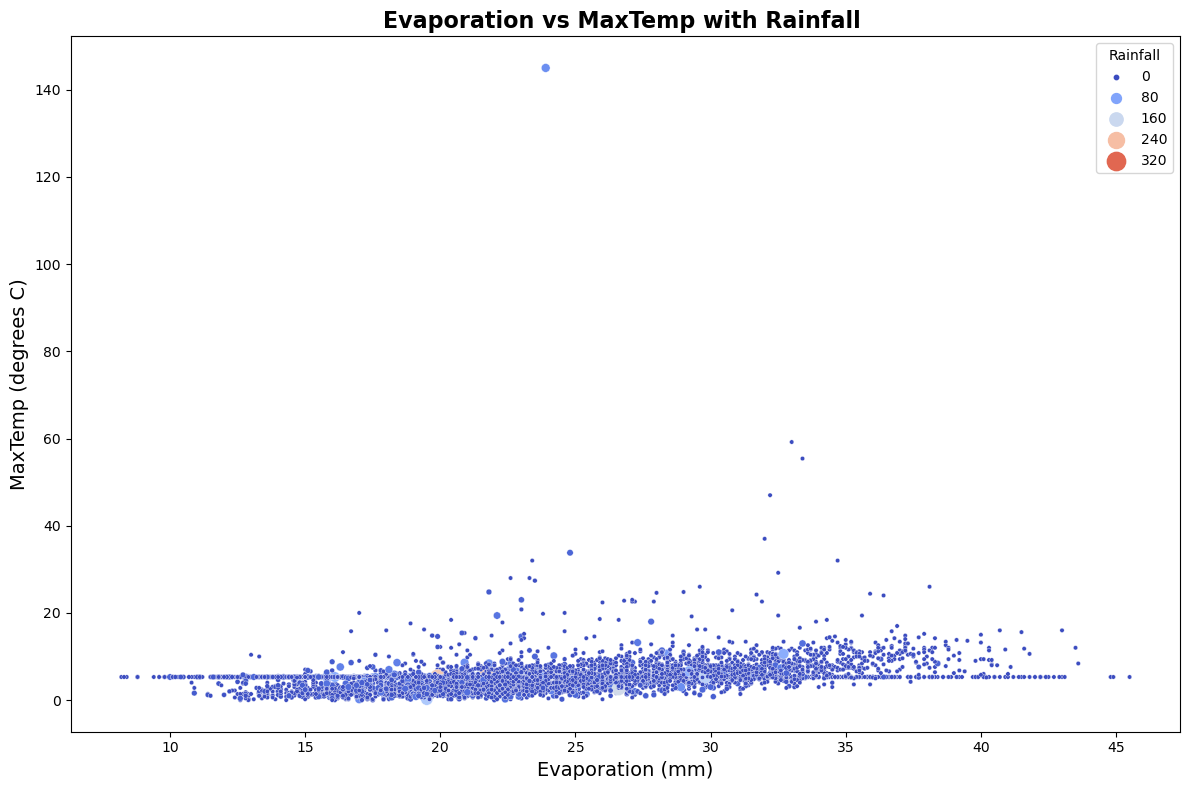

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure layout to avoid clipping
plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('cividis')

# Scatter plot for Evaporation vs MaxTemp with Rainfall as hue
plt.figure(figsize=(12, 8))
sns.scatterplot(y='Evaporation', x='MaxTemp', hue='Rainfall', data=df, palette='coolwarm',  size='Rainfall', sizes=(10, 200))
plt.title('Evaporation vs MaxTemp with Rainfall ', fontsize=16, fontweight='bold')
plt.xlabel('Evaporation (mm)', fontsize=14)
plt.ylabel('MaxTemp (degrees C)', fontsize=14)
plt.legend(title='Rainfall', loc='upper right')
plt.show()


Based on the observations provided, we are able to figure that normal rainfall 0-50mm when evaporation is between 18-35mm at temperatures ranging from 5 to 10 degrees.

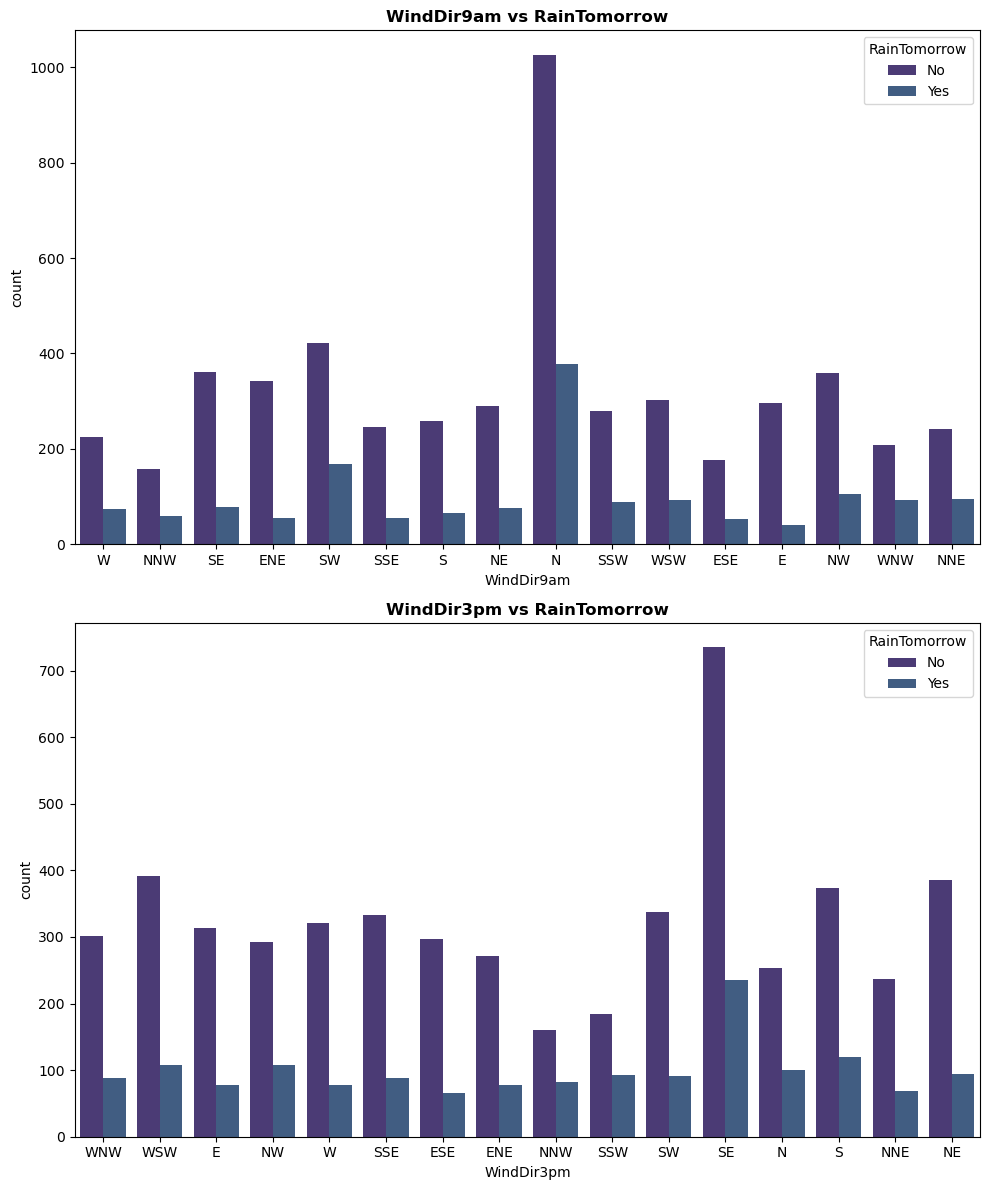

In [42]:

plt.rcParams["figure.autolayout"] = True

# Set seaborn color palette
sns.set_palette('viridis')

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# countplot for WindDir9am vs RainTomorrow
sns.countplot(x='WindDir9am', hue='RainTomorrow', data=df, ax=axes[0])
axes[0].set_title('WindDir9am vs RainTomorrow', fontweight='bold')

# countplot for WindDir3pm vs RainTomorrow
sns.countplot(x='WindDir3pm', hue='RainTomorrow', data=df, ax=axes[1])
axes[1].set_title('WindDir3pm vs RainTomorrow', fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Dropping Unwanted Columns

In [29]:
df.drop(['Rainfall_Category'],axis=1, inplace=True)

# Feature selection and Engineering

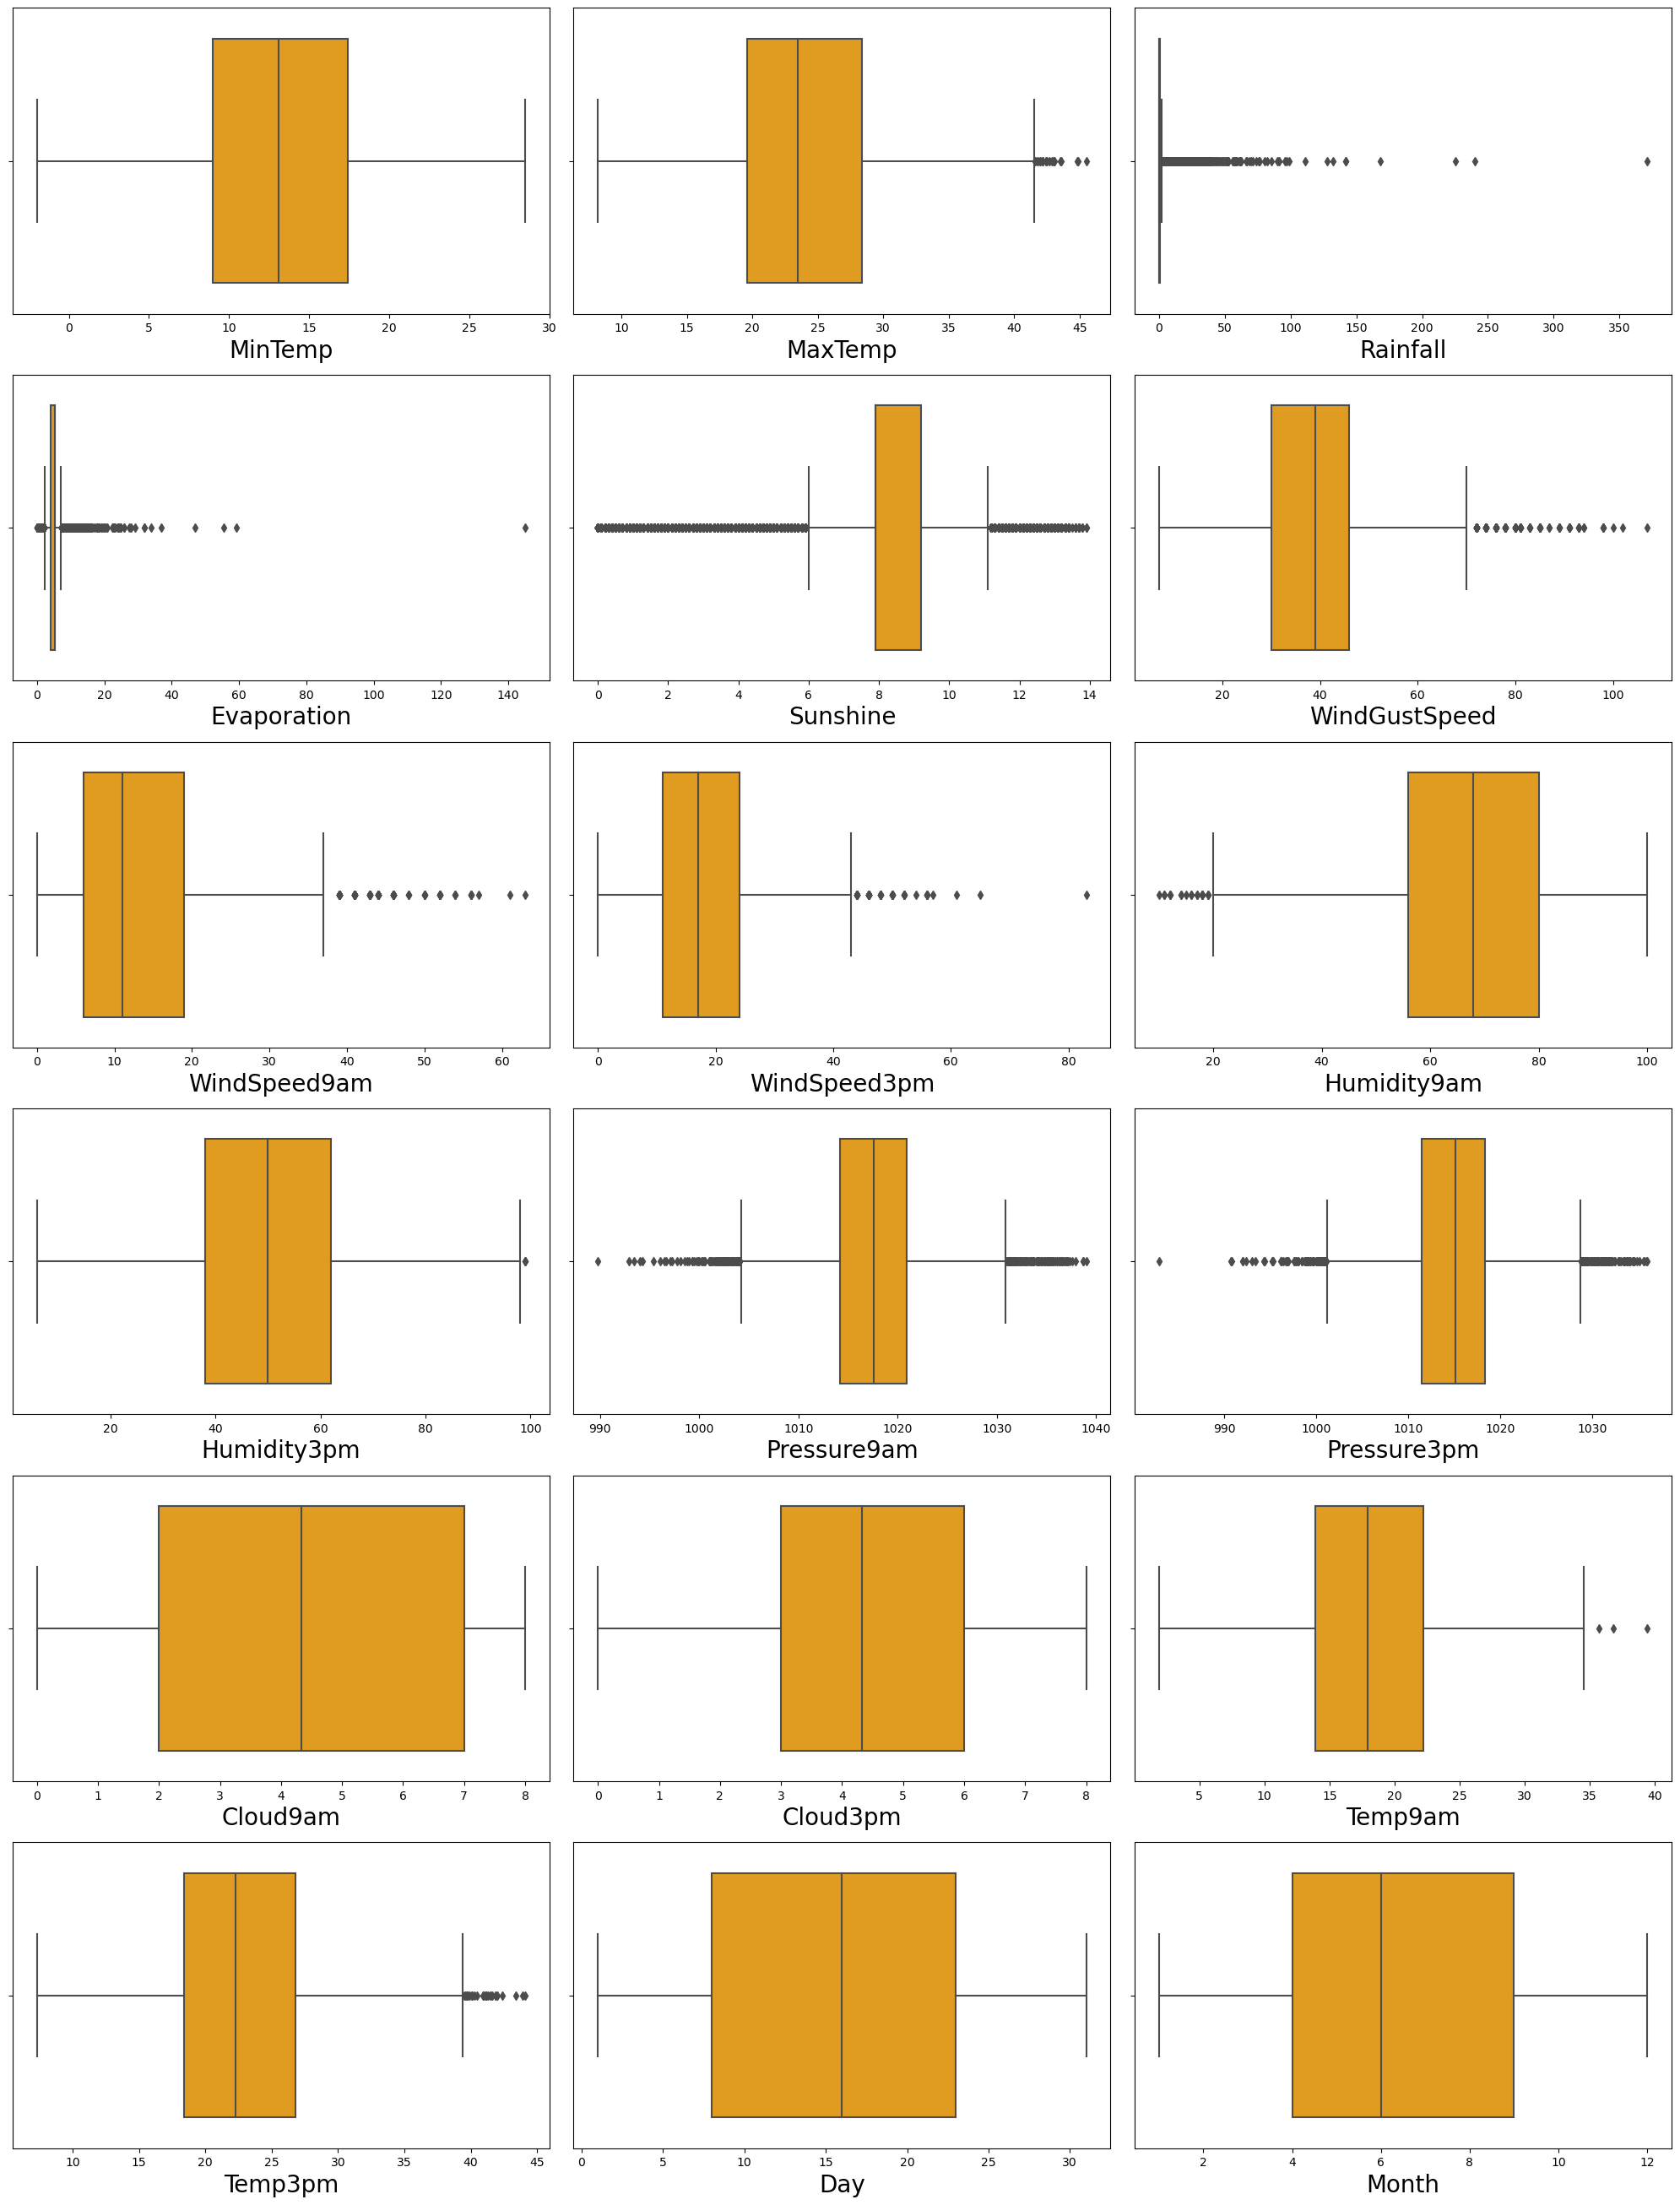

In [30]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in numerical_col:
    if plotnumber<=18:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='orange')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

As we can observe that there are lots of outliners are present in  'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'.

we are going to use z score method to remove the outliners.

In [31]:
feature = df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]


z=np.abs(zscore(feature))

z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1.954990e-01,0.202435,5.312920e-16,2.924379e-15,3.754887e-01,0.737499,0.673324,0.203327,1.646846,1.344002,0.173897,0.152152
1,1.634110e-01,0.259635,5.312920e-16,2.924379e-15,3.754887e-01,0.897347,0.463855,1.368138,1.165715,1.226694,0.121468,0.266510
2,2.612956e-01,0.259635,5.312920e-16,2.924379e-15,5.250161e-01,0.635321,0.882794,1.717352,1.663437,1.075869,0.542637,0.082299
3,6.365197e-01,0.259635,5.312920e-16,2.924379e-15,1.119786e+00,0.182102,0.897697,1.309935,0.004365,0.388779,0.035820,0.634933
4,1.338026e+00,0.164301,5.312920e-16,2.924379e-15,1.511975e-01,0.590814,0.254385,0.843553,1.132534,1.528343,0.016609,1.170820
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.139286e-01,0.259635,5.312920e-16,2.924379e-15,5.964399e-01,0.022254,0.688228,0.960721,1.156985,0.868092,1.362295,0.051673
8421,1.960392e-01,0.259635,5.312920e-16,2.924379e-15,1.269314e+00,0.022254,0.897697,0.669709,0.974487,0.666993,1.222484,0.300003
8422,4.570647e-01,0.259635,5.312920e-16,2.924379e-15,1.478575e-01,0.386458,0.897697,0.844316,0.559719,0.281552,0.942861,0.567947
8423,4.733788e-01,0.259635,5.312920e-16,2.924379e-15,8.207311e-01,0.022254,1.107167,0.960721,0.294268,0.231277,0.488473,0.551200


In [32]:
# creating new dataframe

new_df= df[(z<3).all(axis=1)]
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.302395,7.890896,W,44.000000,W,WNW,...,1007.1,8.000000,4.320988,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.302395,7.890896,WNW,44.000000,NNW,WSW,...,1007.8,4.336806,4.320988,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.302395,7.890896,WSW,46.000000,W,WSW,...,1008.7,4.336806,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.302395,7.890896,NE,24.000000,SE,E,...,1012.8,4.336806,4.320988,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.302395,7.890896,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.302395,7.890896,E,31.000000,SE,ENE,...,1020.3,4.336806,4.320988,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.302395,7.890896,NNW,22.000000,SE,N,...,1019.1,4.336806,4.320988,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.302395,7.890896,N,37.000000,SE,WNW,...,1016.8,4.336806,4.320988,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.302395,7.890896,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


So here we have removed the outliers

SO here we can see the new dataframe after removing the outliers. Here we have removed the outliers whose zscore is less than 3.

In [33]:
df.shape

(6762, 25)

In [34]:
new_df.shape

(6407, 25)

In [35]:
# checking the data loss
data_loss = (6762-6407)/6762*100
data_loss

5.249926057379473

Here We are losing only 5.24% of data by removing outliers using zscore. 

We are not going to use IQR becaure there must be chances of more data loss.

In [36]:
new_df.skew()

MinTemp         -0.078630
MaxTemp          0.265852
Rainfall         3.521311
Evaporation      0.720942
Sunshine        -0.888850
WindGustSpeed    0.476735
WindSpeed9am     0.677232
WindSpeed3pm     0.341098
Humidity9am     -0.233158
Humidity3pm      0.156727
Pressure9am      0.064072
Pressure3pm      0.090257
Cloud9am        -0.203224
Cloud3pm        -0.146926
Temp9am         -0.071943
Temp3pm          0.290030
Day              0.004932
Month            0.032783
Year             0.352752
dtype: float64

Rainfall is a target variable so we can not touch that data. evaporation, sunshine and windspeed9am have some skewness.

In [37]:
skew=['Evaporation','Sunshine','WindSpeed9am']


scaler = PowerTransformer(method='yeo-johnson')

new_df[skew] = scaler.fit_transform(new_df[skew].values)

In [38]:
new_df[skew].skew()

Evaporation     0.071763
Sunshine       -0.052917
WindSpeed9am   -0.132238
dtype: float64

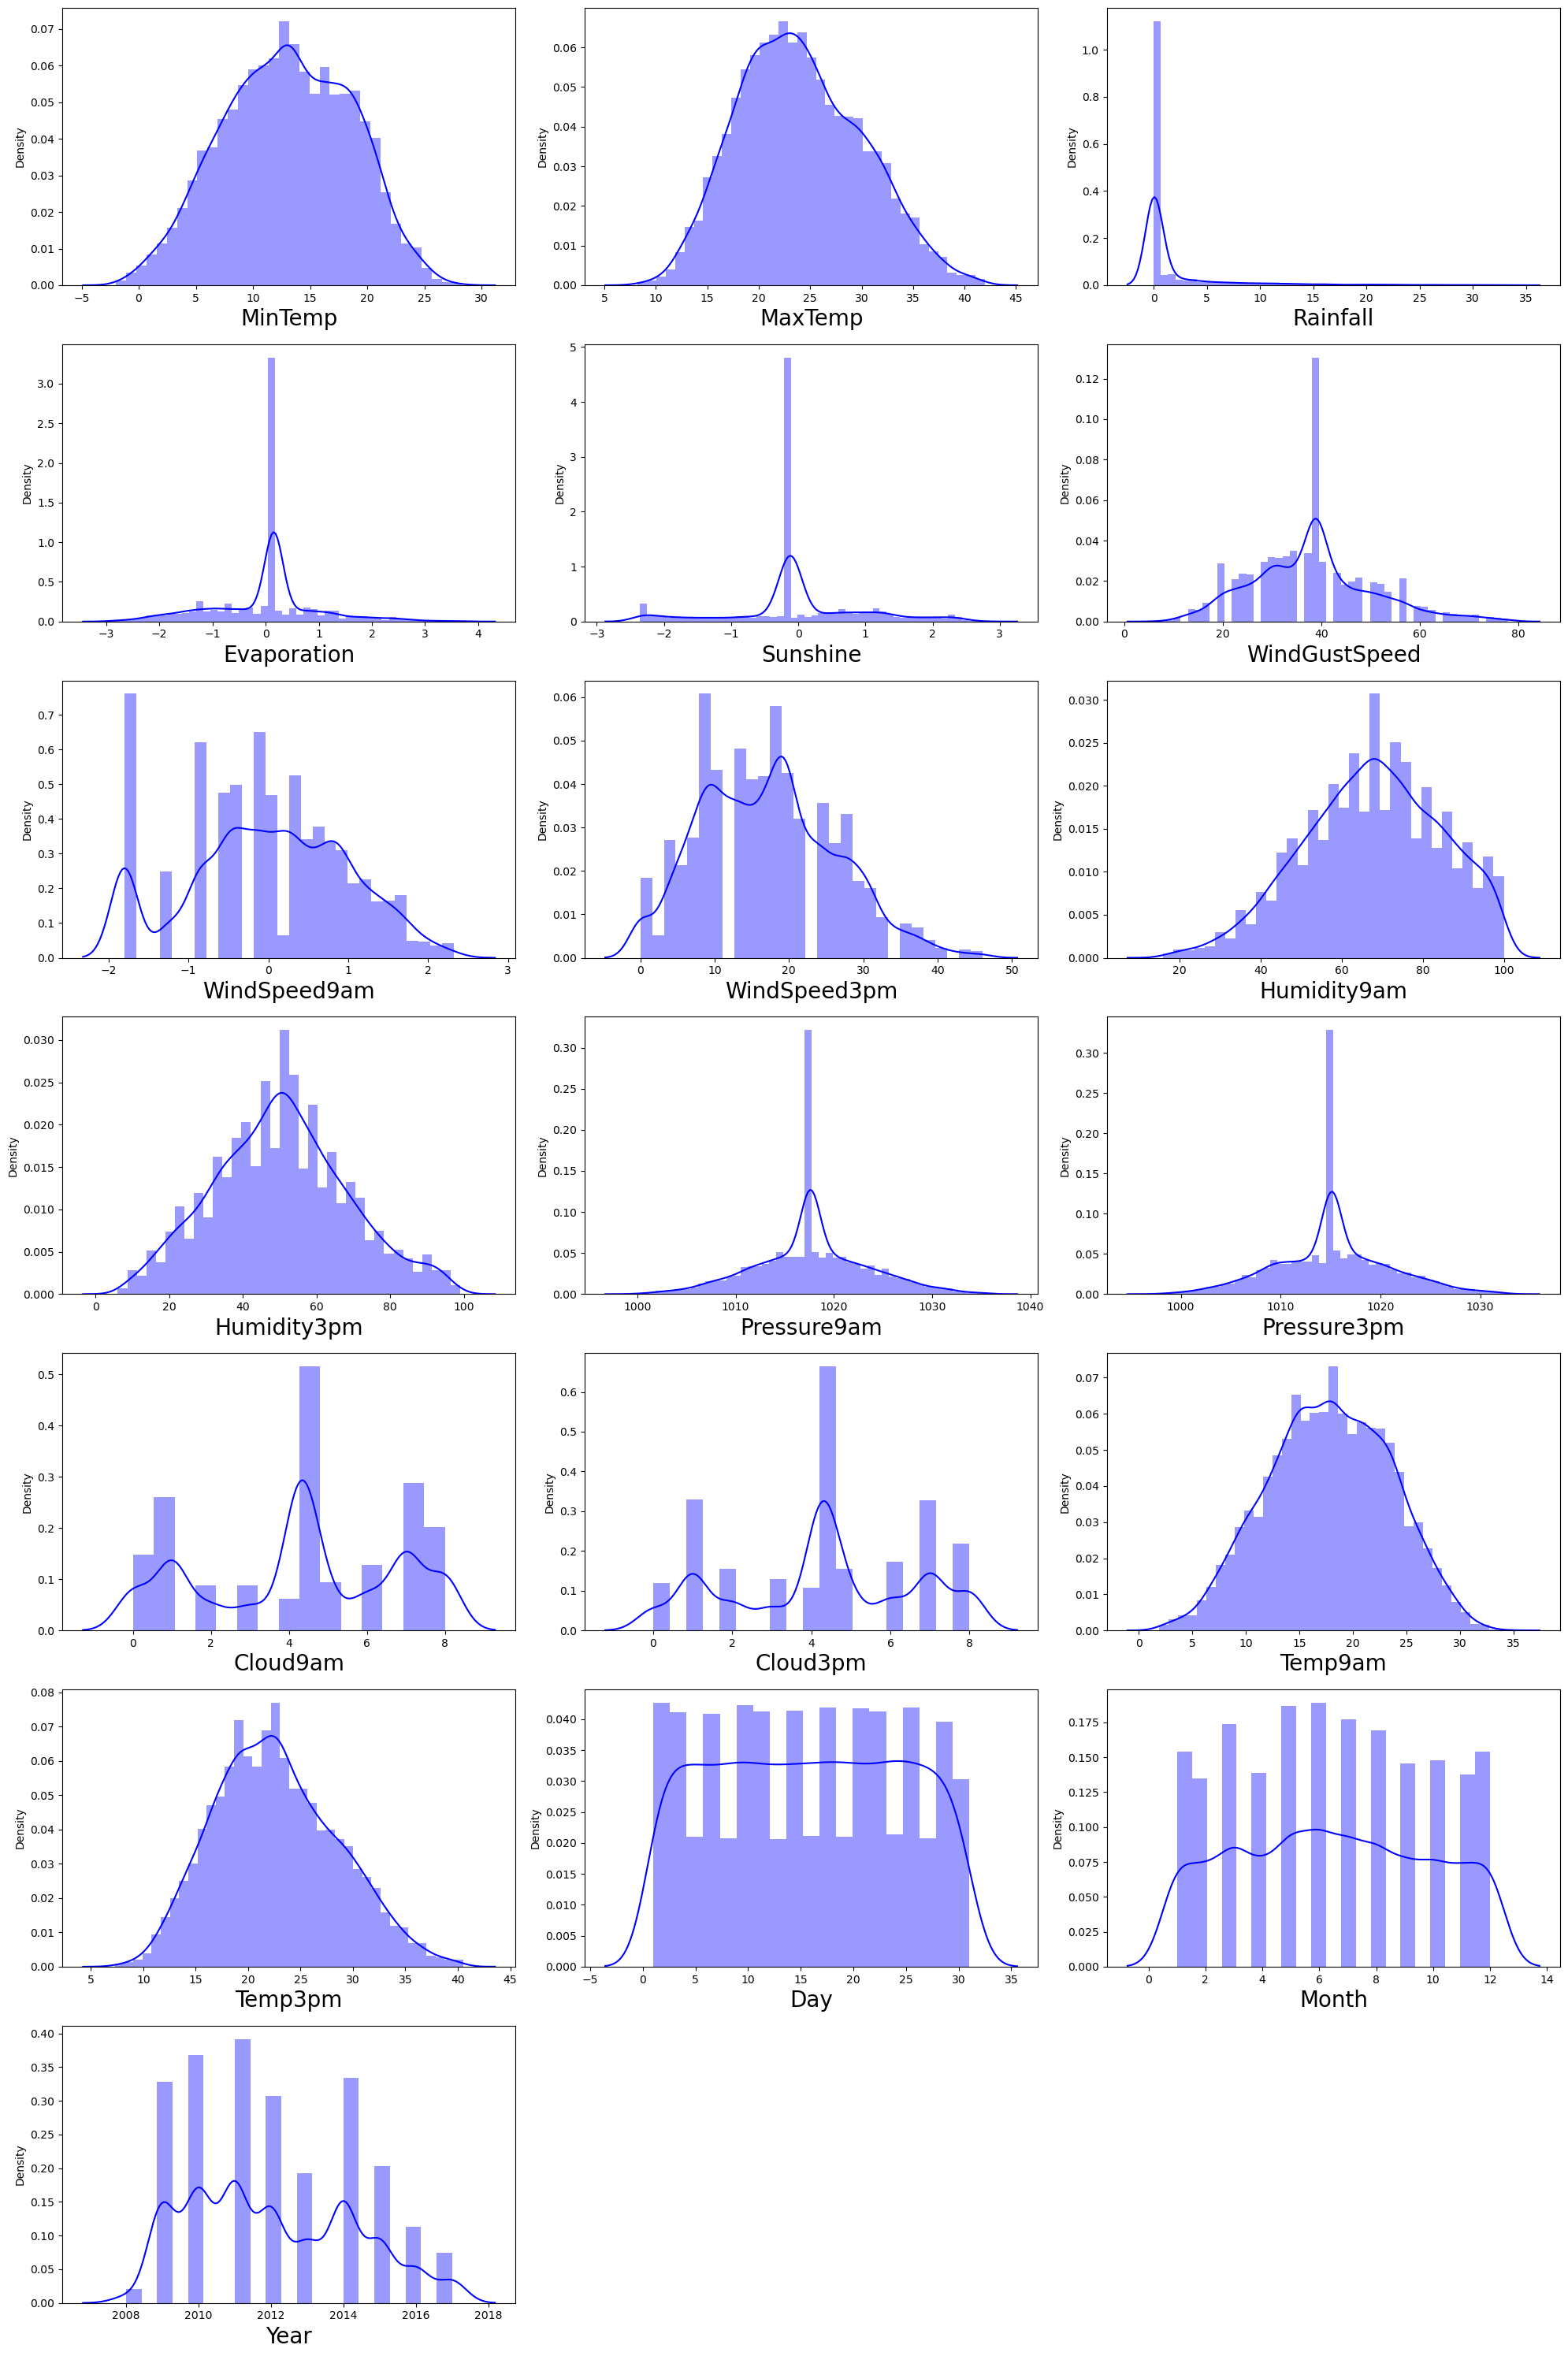

In [39]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=21:
        plt.subplot(7,3,plotnumber)
        sns.distplot(new_df[col],color = 'b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

# Encoding categorical data

In [40]:
le = LabelEncoder()
for i in categorial_col:
    new_df[i] = le.fit_transform(new_df[i])
new_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,0.155318,-0.119188,13,44.0,13,14,...,1007.1,8.000000,4.320988,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,0.155318,-0.119188,14,44.0,6,15,...,1007.8,4.336806,4.320988,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,0.155318,-0.119188,15,46.0,13,15,...,1008.7,4.336806,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,0.155318,-0.119188,4,24.0,9,0,...,1012.8,4.336806,4.320988,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,0.155318,-0.119188,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


# Heatmap Corrleation

In [41]:
# checking the correlation between features and the target
cor = new_df.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.091830,0.073582,0.009368,0.119576,0.061301,-0.086880,0.275181,-0.103029,-0.000274,...,-0.018279,-0.005822,-0.005027,0.098945,0.069752,-0.004129,0.000945,-0.004743,-0.070988,0.504649
MinTemp,0.091830,1.000000,0.730372,0.096262,0.360133,0.080109,-0.142288,0.244397,-0.021236,-0.143857,...,-0.447907,0.094770,0.044541,0.892892,0.699310,0.072064,0.092532,0.018449,-0.235807,0.033928
MaxTemp,0.073582,0.730372,1.000000,-0.138976,0.470486,0.383537,-0.203445,0.170637,-0.193370,-0.165565,...,-0.426378,-0.240935,-0.239690,0.865420,0.974874,-0.219895,-0.158687,0.020053,-0.173037,0.084611
Rainfall,0.009368,0.096262,-0.138976,1.000000,-0.109740,-0.184814,0.070842,0.093563,0.120616,0.072979,...,-0.055144,0.237287,0.195774,-0.031293,-0.148020,0.701909,0.274056,-0.007483,-0.006571,0.002163
Evaporation,0.119576,0.360133,0.470486,-0.109740,1.000000,0.424154,-0.139087,0.204310,-0.131494,-0.025674,...,-0.304535,-0.112556,-0.160699,0.421723,0.459308,-0.180715,-0.108459,0.005859,-0.051076,0.123429
Sunshine,0.061301,0.080109,0.383537,-0.184814,0.424154,1.000000,-0.096553,0.061344,-0.084981,-0.059034,...,-0.101733,-0.551381,-0.572218,0.281408,0.400419,-0.240572,-0.328842,-0.000531,0.001004,0.021385
WindGustDir,-0.086880,-0.142288,-0.203445,0.070842,-0.139087,-0.096553,1.000000,-0.005101,0.382339,0.455715,...,-0.007188,0.113561,0.074065,-0.158226,-0.214261,0.108289,0.034253,0.016733,0.032966,-0.184555
WindGustSpeed,0.275181,0.244397,0.170637,0.093563,0.204310,0.061344,-0.005101,1.000000,-0.070150,0.090114,...,-0.327382,-0.000677,0.036479,0.224415,0.138975,0.077862,0.164265,-0.003471,0.049308,-0.014609
WindDir9am,-0.103029,-0.021236,-0.193370,0.120616,-0.131494,-0.084981,0.382339,-0.070150,1.000000,0.207709,...,0.057930,0.070909,0.054595,-0.067019,-0.202156,0.149778,0.035059,-0.007662,0.021764,-0.083445
WindDir3pm,-0.000274,-0.143857,-0.165565,0.072979,-0.025674,-0.059034,0.455715,0.090114,0.207709,1.000000,...,-0.040782,0.070080,0.049015,-0.150642,-0.176770,0.095506,-0.000374,0.001302,0.029949,0.005306


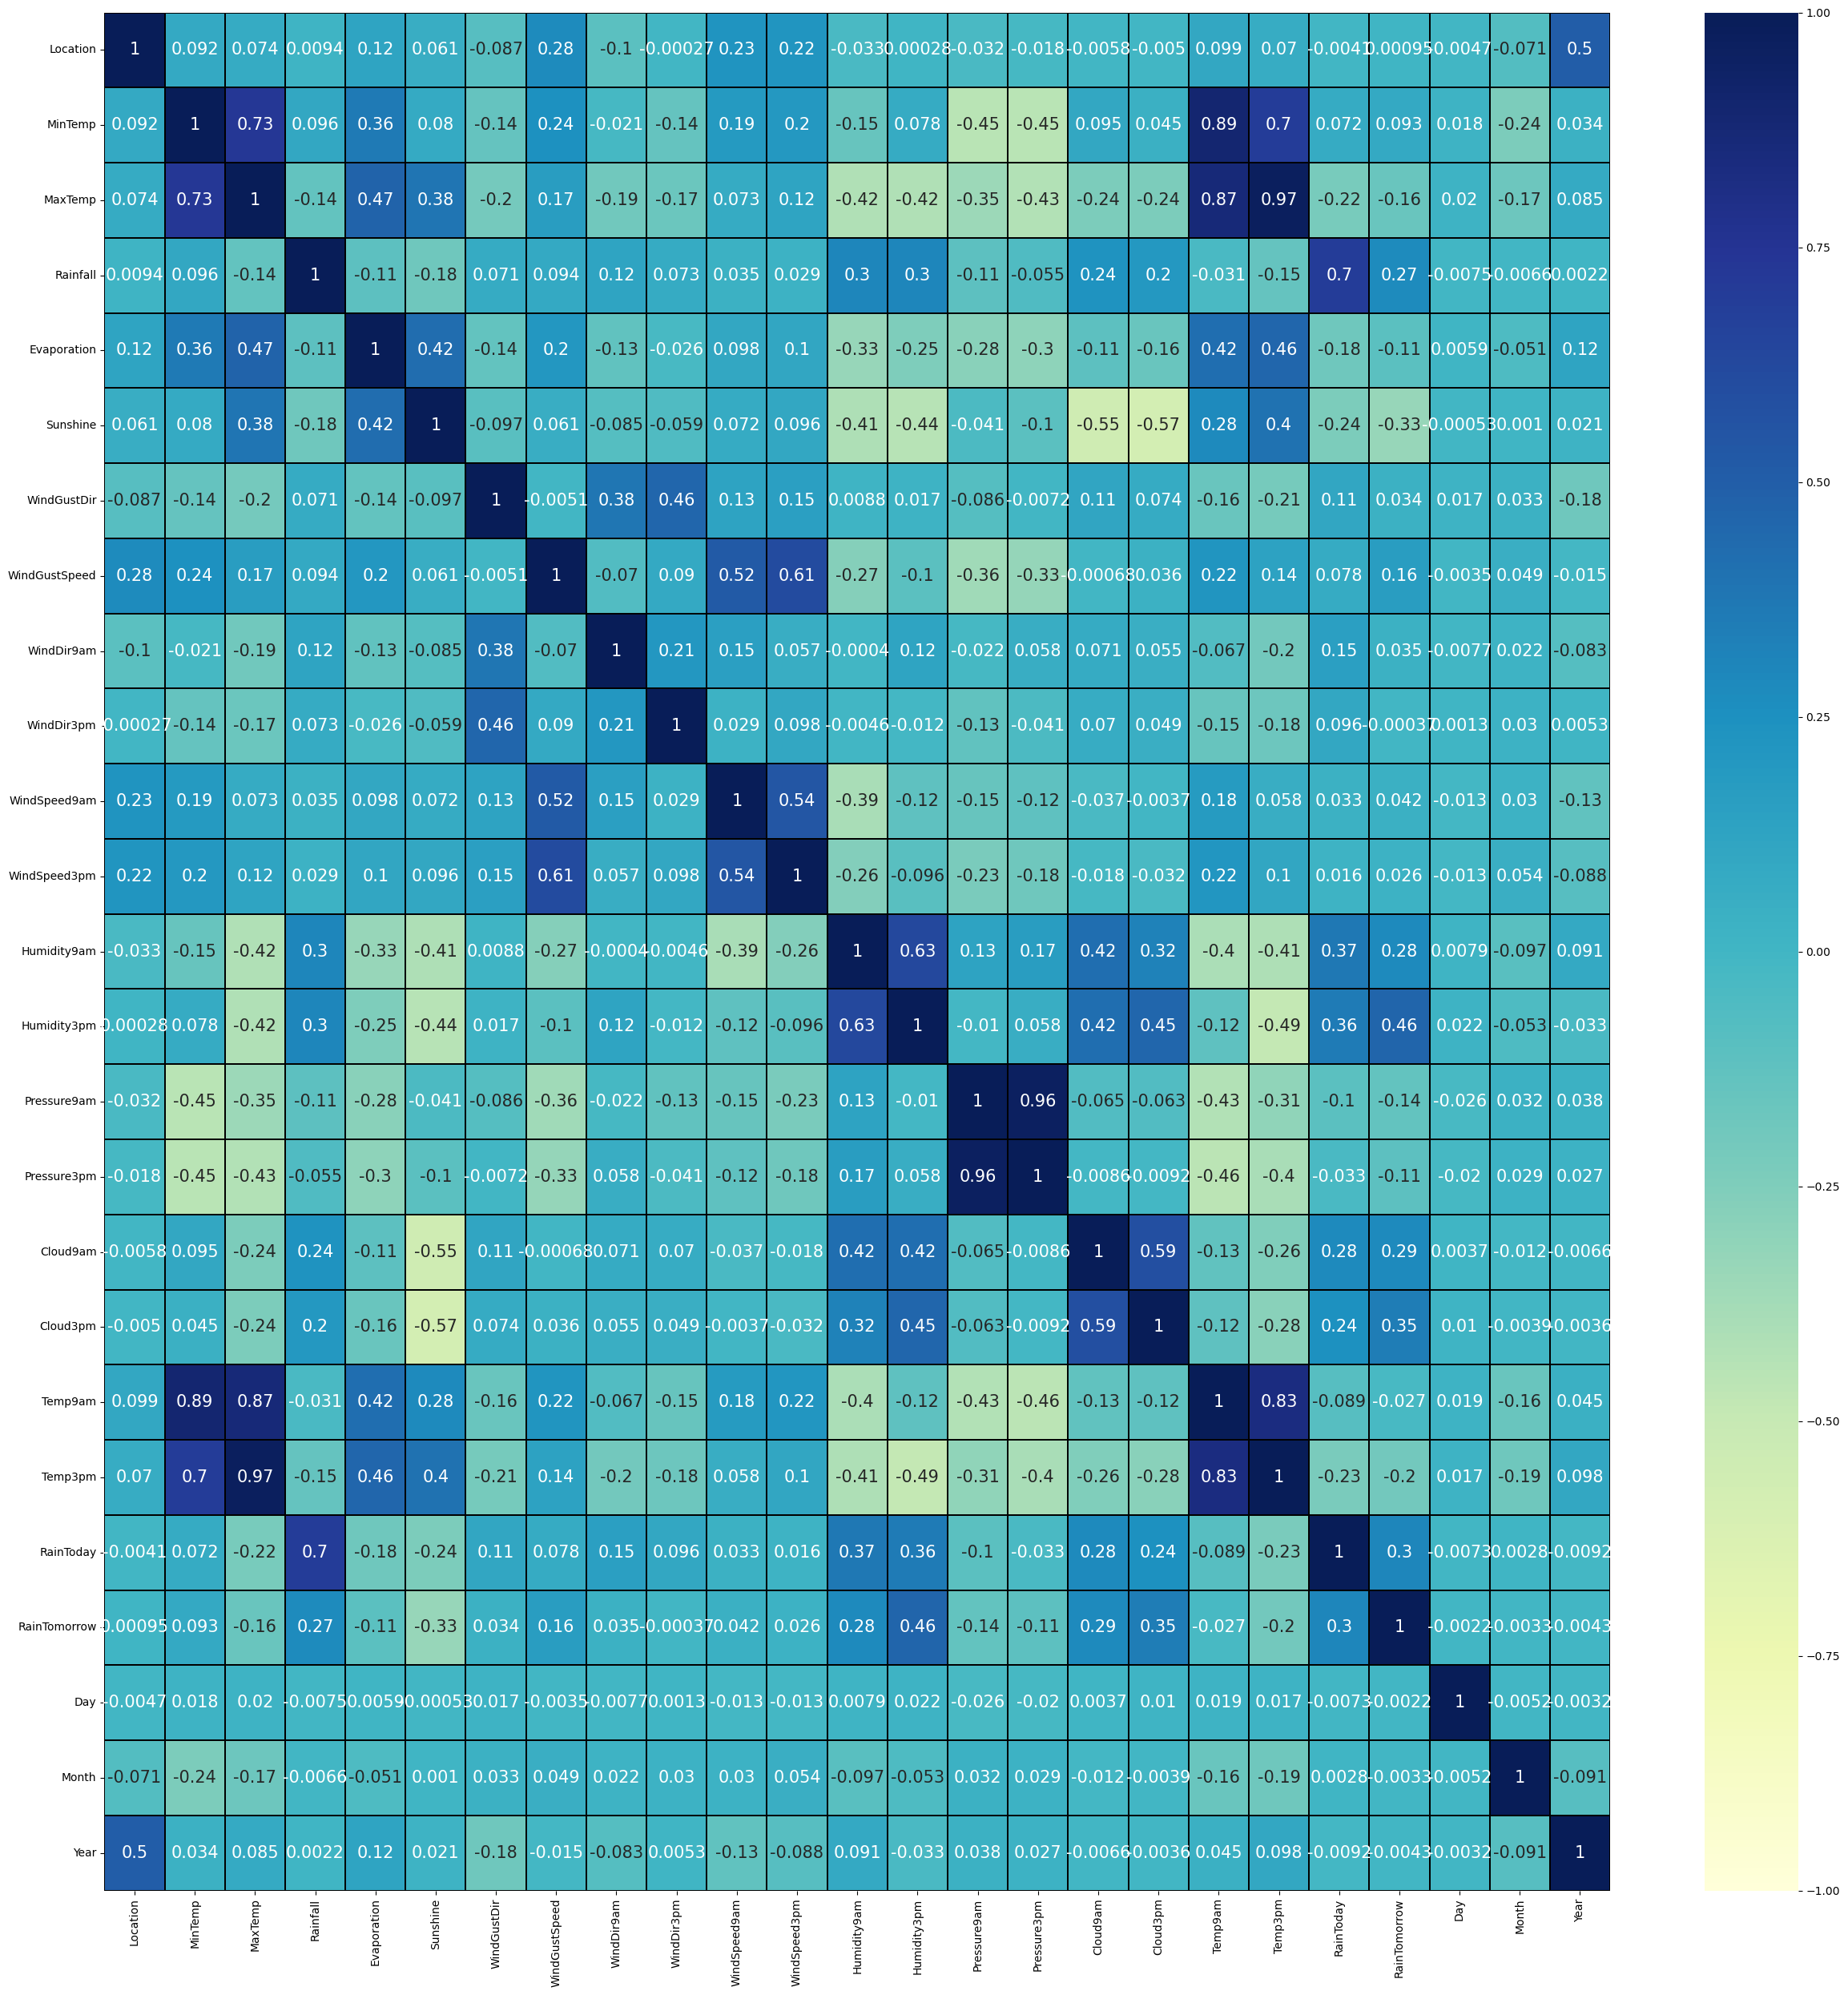

In [42]:
# visualizing the correlation matrix by plotting heat map

plt.figure(figsize=(25,25))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

In [43]:
cor['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.464068
Cloud3pm         0.351091
RainToday        0.302807
Cloud9am         0.287082
Humidity9am      0.283474
Rainfall         0.274056
WindGustSpeed    0.164265
MinTemp          0.092532
WindSpeed9am     0.041582
WindDir9am       0.035059
WindGustDir      0.034253
WindSpeed3pm     0.025748
Location         0.000945
WindDir3pm      -0.000374
Day             -0.002235
Month           -0.003271
Year            -0.004300
Temp9am         -0.026969
Evaporation     -0.108459
Pressure3pm     -0.113059
Pressure9am     -0.139694
MaxTemp         -0.158687
Temp3pm         -0.201939
Sunshine        -0.328842
Name: RainTomorrow, dtype: float64

In [44]:
cor['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.701909
Humidity9am      0.302851
Humidity3pm      0.298896
RainTomorrow     0.274056
Cloud9am         0.237287
Cloud3pm         0.195774
WindDir9am       0.120616
MinTemp          0.096262
WindGustSpeed    0.093563
WindDir3pm       0.072979
WindGustDir      0.070842
WindSpeed9am     0.035283
WindSpeed3pm     0.028958
Location         0.009368
Year             0.002163
Month           -0.006571
Day             -0.007483
Temp9am         -0.031293
Pressure3pm     -0.055144
Evaporation     -0.109740
Pressure9am     -0.114137
MaxTemp         -0.138976
Temp3pm         -0.148020
Sunshine        -0.184814
Name: Rainfall, dtype: float64

# Visualizing the correlation between label and features using bar plot

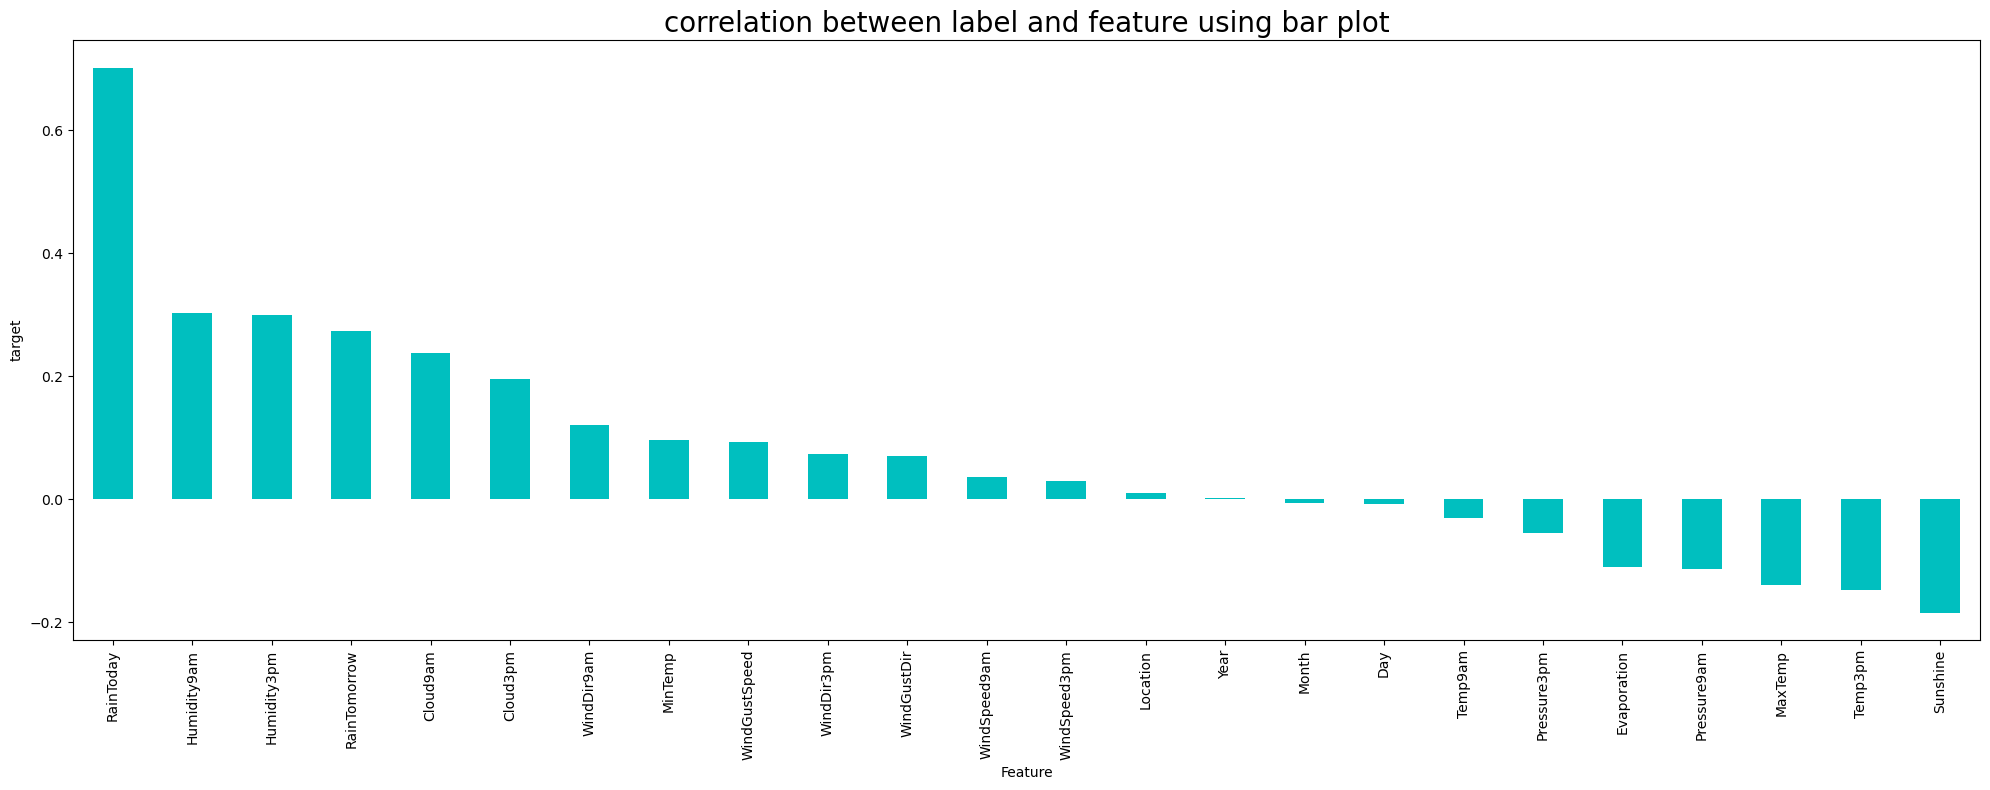

In [45]:
plt.figure(figsize=(20,8))
new_df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

# Visualizing the correlation between label and features using bar plot

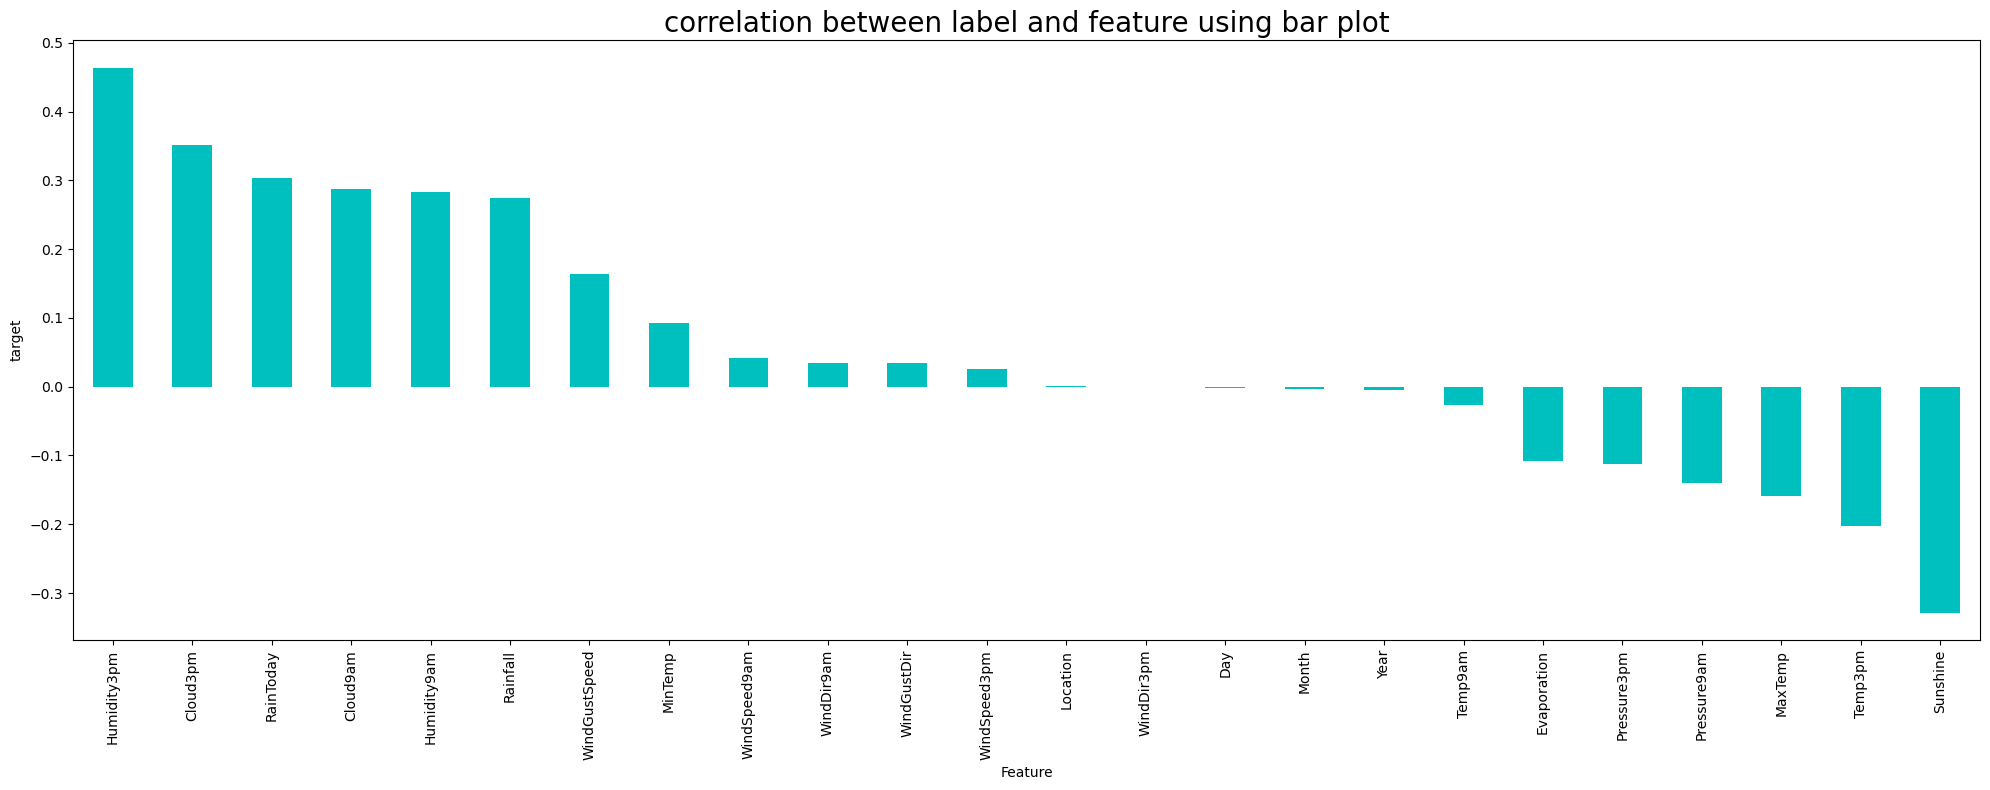

In [46]:
plt.figure(figsize=(20,8))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

# 1. Prediction for RainTommrow

# Separating the features and label variables into x and y

In [47]:
# Splitting data in target and dependent feature
x = new_df.drop("RainTomorrow", axis=1)
y = new_df["RainTomorrow"]

# Balanceing Imbalanced target feature

In [48]:
y.value_counts()

0    4979
1    1428
Name: RainTomorrow, dtype: int64

In [49]:

SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [50]:
y.value_counts()

0    4979
1    4979
Name: RainTomorrow, dtype: int64

# Standard Scaling

In [51]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.436266,0.005376,-0.080984,-0.370501,0.255938,0.111800,1.276784,0.370067,1.368417,1.458762,...,-1.709799,-1.400291,1.360533,-0.226723,-0.148782,-0.010256,-0.587323,-1.679343,1.797867,-1.774094
1,-1.436266,-1.110532,0.293668,-0.483193,0.255938,0.111800,1.475777,0.370067,-0.233405,1.692234,...,-1.190881,-1.273896,-0.187328,-0.226723,-0.094295,0.424094,-0.587323,-1.563457,1.797867,-1.774094
2,-1.436266,-0.087617,0.395846,-0.483193,0.255938,0.111800,1.674769,0.528289,1.368417,1.692234,...,-1.727693,-1.111388,-0.187328,-1.268062,0.595877,0.232980,-0.587323,-1.447570,1.797867,-1.774094
3,-1.436266,-0.775760,0.787528,-0.483193,0.255938,0.111800,-0.514147,-1.212151,0.453090,-1.809837,...,0.061681,-0.371074,-0.187328,-0.226723,0.069167,0.806323,-0.587323,-1.331683,1.797867,-1.774094
4,-1.436266,0.767913,1.519803,-0.295373,0.255938,0.111800,1.276784,0.132734,-1.377563,-0.175537,...,-1.155093,-1.598911,0.937989,1.423911,0.014679,1.362292,-0.587323,-1.215797,1.797867,-1.774094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,-0.417920,0.184529,0.097421,-0.085710,-1.970936,-1.365219,-0.315154,-0.398801,-0.462236,-0.409009,...,-0.986904,-1.774283,0.998738,0.910744,-0.085880,-0.019247,1.702640,1.449595,-0.712743,-0.869955
9954,1.279325,0.032016,0.091589,-0.206011,0.692723,0.451910,0.281823,0.733530,1.597249,1.458762,...,-2.064749,-1.992718,1.177828,0.393257,-0.039350,0.147503,-0.587323,1.101935,0.856388,0.938324
9955,-1.775715,0.930266,0.083432,0.083071,0.255938,0.111800,-0.514147,0.216332,-0.919900,0.758348,...,-1.245577,-1.376790,0.056017,0.032780,0.298537,0.035642,1.702640,0.638389,1.484040,0.486254
9956,0.939876,0.032349,-0.680410,2.878494,-1.015552,-0.977301,0.082830,1.067569,0.224259,1.225291,...,-0.642263,-0.270110,0.937989,0.343363,-0.335826,-0.510464,1.702640,-0.172817,0.542562,-0.417885


# Checking Multicollinearity between features using variance_inflation_factor

In [52]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.642518,Location
1,10.078689,MinTemp
2,25.931890,MaxTemp
3,2.096935,Rainfall
4,1.631871,Evaporation
5,2.183330,Sunshine
6,1.554698,WindGustDir
7,2.112340,WindGustSpeed
8,1.381945,WindDir9am
9,1.399492,WindDir3pm


We can observe that there is a lot of multicolinearity in the following features: MaxTemp, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

In [53]:
# Dropping Temp3pm column
x.drop("Temp3pm",axis=1,inplace=True)

In [54]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.641387,Location
1,10.043766,MinTemp
2,10.340597,MaxTemp
3,2.095836,Rainfall
4,1.631734,Evaporation
5,2.183111,Sunshine
6,1.545793,WindGustDir
7,2.099143,WindGustSpeed
8,1.380260,WindDir9am
9,1.399035,WindDir3pm


In [55]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [56]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.638503,Location
1,9.947151,MinTemp
2,9.975592,MaxTemp
3,2.094231,Rainfall
4,1.614669,Evaporation
5,2.175939,Sunshine
6,1.531697,WindGustDir
7,2.078169,WindGustSpeed
8,1.353080,WindDir9am
9,1.314229,WindDir3pm


In [57]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [58]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.636188,Location
1,4.973407,MinTemp
2,5.849546,MaxTemp
3,2.090648,Rainfall
4,1.599766,Evaporation
5,2.151022,Sunshine
6,1.530887,WindGustDir
7,2.039330,WindGustSpeed
8,1.351889,WindDir9am
9,1.314088,WindDir3pm


We can now observe that we have eliminated all of the multi-colinearity and that it no longer exists in the dataset.

# Machine Learning Model Building

# Finding the best random state

In [59]:
maxAccu = 0
maxRS = 0

for i in range(1, 99):  
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    
    rf = RandomForestClassifier(n_jobs=-1) 
    rf.fit(x_train, y_train)
    
    pred = rf.predict(x_test)
    
    acc = accuracy_score(y_test, pred)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print("Best accuracy is", maxAccu, "on Random_state", maxRS)


Best accuracy is 0.9116465863453815 on Random_state 26


In [60]:
#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=26)

# Logistic Regression

In [61]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

# Prediction
predlr = lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.7811244979919679
[[1160  296]
 [ 358 1174]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1456
           1       0.80      0.77      0.78      1532

    accuracy                           0.78      2988
   macro avg       0.78      0.78      0.78      2988
weighted avg       0.78      0.78      0.78      2988



With this model we are getting an accuracy score of 79%

# Random Forest Classifier

In [62]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.9096385542168675
[[1314  142]
 [ 128 1404]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1456
           1       0.91      0.92      0.91      1532

    accuracy                           0.91      2988
   macro avg       0.91      0.91      0.91      2988
weighted avg       0.91      0.91      0.91      2988



With this model we are getting an accuracy score of 91%

# AdaBoost Classifier

In [63]:

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

# Prediction
predabc = abc.predict(x_test)

print(accuracy_score(y_test, predabc))
print(confusion_matrix(y_test, predabc))
print(classification_report(y_test,predabc))

0.8403614457831325
[[1231  225]
 [ 252 1280]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1456
           1       0.85      0.84      0.84      1532

    accuracy                           0.84      2988
   macro avg       0.84      0.84      0.84      2988
weighted avg       0.84      0.84      0.84      2988



With this model we are getting an accuracy score of 84%

# Gradient Boosting Classifier

In [64]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,pred))

0.8744979919678715
[[1290  166]
 [ 209 1323]]
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      1456
           1       0.51      0.51      0.51      1532

    accuracy                           0.50      2988
   macro avg       0.50      0.50      0.50      2988
weighted avg       0.50      0.50      0.50      2988



# Extra Trees Classifier

In [65]:
xtc = ExtraTreesClassifier()
xtc.fit(x_train,y_train)

# Prediction
predxtc = xtc.predict(x_test)

print(accuracy_score(y_test, predxtc))
print(confusion_matrix(y_test, predxtc))
print(classification_report(y_test,predxtc))

0.9270414993306559
[[1322  134]
 [  84 1448]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1456
           1       0.92      0.95      0.93      1532

    accuracy                           0.93      2988
   macro avg       0.93      0.93      0.93      2988
weighted avg       0.93      0.93      0.93      2988



In [66]:
# cv score for Logistic Regression
print('Logistic Regression:',cross_val_score(lr,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rf,x,y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(abc,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier:',cross_val_score(gb,x,y,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier:',cross_val_score(xtc,x,y,cv=5).mean())

Logistic Regression: 0.7048765630074291
Random Forest Classifier: 0.7068943276874449
AdaBoosting Classifier: 0.6497531058437668
Gradient Boosting Classifier: 0.6605957733495509
Extra Trees Classifier: 0.7118176876264475


We can see from the accuracy score of the models and after cross validation, ExtraTress is the best fit model.

# Hyper Parameter Tuning : GridSearchCV

In [67]:
# ExtraTrees Classifier
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [68]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [69]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [70]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

In [71]:
Rainfall_Tomorrow=ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=300, n_jobs=-2, random_state=50)
Rainfall_Tomorrow.fit(x_train, y_train)
pred = Rainfall_Tomorrow.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.73360107095047


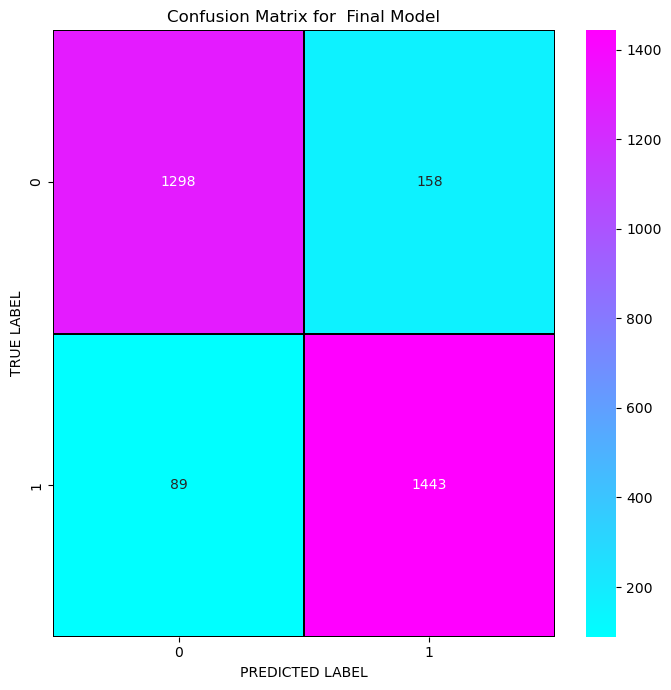

In [72]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="cool",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show() 

# Plotting ROC and Compare AUC for the final model

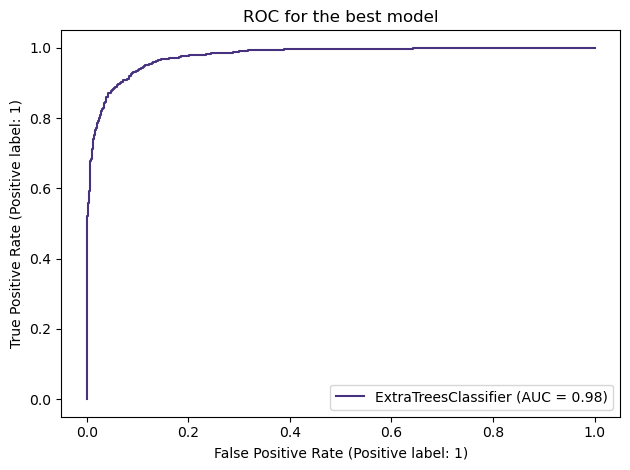

In [73]:
plot_roc_curve(Rainfall_Tomorrow, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Saving the Model

In [74]:
joblib.dump(Rainfall_Tomorrow,"Prediction_of_Rainfall_Tomorrow.pkl")

['Prediction_of_Rainfall_Tomorrow.pkl']

# 2. Prediction for Rainfall

In [75]:
new_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,0.155318,-0.119188,13,44.0,13,14,...,1007.1,8.000000,4.320988,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,0.155318,-0.119188,14,44.0,6,15,...,1007.8,4.336806,4.320988,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,0.155318,-0.119188,15,46.0,13,15,...,1008.7,4.336806,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,0.155318,-0.119188,4,24.0,9,0,...,1012.8,4.336806,4.320988,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,0.155318,-0.119188,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [76]:
x = new_df.drop("Rainfall", axis=1)
y = new_df["Rainfall"]

In [77]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.391645,0.069578,-0.190762,0.155318,-0.119188,1.222623,0.483008,1.317169,1.373565,0.905269,...,-1.436719,1.496140,0.018036,-0.162440,-0.149647,-0.5353,-0.535541,-1.672094,1.655738,-1.770678
1,-1.391645,-1.013533,0.174345,0.155318,-0.119188,1.413550,0.483008,-0.222773,1.596824,-0.858713,...,-1.313226,0.015069,0.018036,-0.109689,0.276338,-0.5353,-0.535541,-1.558323,1.655738,-1.770678
2,-1.391645,-0.020681,0.273920,0.155318,-0.119188,1.604477,0.646334,1.317169,1.596824,0.822736,...,-1.154448,0.015069,-0.982601,0.558492,0.088905,-0.5353,-0.535541,-1.444552,1.655738,-1.770678
3,-1.391645,-0.688600,0.655623,0.155318,-0.119188,-0.495719,-1.150250,0.437202,-1.752064,0.067446,...,-0.431130,0.015069,0.018036,0.048565,0.651206,-0.5353,-0.535541,-1.330782,1.655738,-1.770678
4,-1.391645,0.809704,1.369241,0.155318,-0.119188,1.222623,0.238019,-1.322732,-0.189249,-0.410989,...,-1.630780,1.091829,1.604152,-0.004187,1.196467,-0.5353,-0.535541,-1.217011,1.655738,-1.770678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,1.203028,-1.843918,-0.107783,0.155318,-0.119188,-1.259426,-0.578610,0.437202,-1.528805,0.275791,...,0.892013,0.015069,0.018036,-1.358132,-0.047411,-0.5353,-0.535541,0.603320,-0.134393,2.169074
6403,1.203028,-1.699504,0.207537,0.155318,-0.119188,-0.113865,-1.313576,0.437202,-1.082286,0.275791,...,0.680310,0.015069,0.018036,-1.217462,0.310417,-0.5353,-0.535541,0.717091,-0.134393,2.169074
6404,1.203028,-1.374570,0.473069,0.155318,-0.119188,-0.686645,-0.088632,0.437202,1.373565,-0.159485,...,0.274546,0.015069,0.018036,-0.936123,0.583048,-0.5353,-0.535541,0.830862,-0.134393,2.169074
6405,1.203028,-0.941326,0.489665,0.155318,-0.119188,0.458916,-0.823599,0.657194,-1.082286,0.275791,...,0.221621,-0.525417,-0.982601,-0.478947,0.566009,-0.5353,-0.535541,0.944633,-0.134393,2.169074


# Checking Multicollinearity between features using variance_inflation_factor

In [78]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.658937,Location
1,9.240147,MinTemp
2,26.328407,MaxTemp
3,1.643406,Evaporation
4,2.186774,Sunshine
5,1.590755,WindGustDir
6,2.260475,WindGustSpeed
7,1.348475,WindDir9am
8,1.422066,WindDir3pm
9,2.020457,WindSpeed9am


We see multicolinearity exist in MaxTemp, Temp9am, Temp3pm, Pressure9am,Pressure3pm.

In [79]:
# Dropping MaxTemp column
x.drop("MaxTemp",axis=1,inplace=True)

In [80]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.658906,Location
1,9.229913,MinTemp
2,1.637569,Evaporation
3,2.186319,Sunshine
4,1.588533,WindGustDir
5,2.247244,WindGustSpeed
6,1.346363,WindDir9am
7,1.421279,WindDir3pm
8,2.012446,WindSpeed9am
9,1.968803,WindSpeed3pm


In [81]:
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)

In [82]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.656830,Location
1,9.124476,MinTemp
2,1.616626,Evaporation
3,2.171315,Sunshine
4,1.576889,WindGustDir
5,2.227938,WindGustSpeed
6,1.323716,WindDir9am
7,1.354013,WindDir3pm
8,2.008283,WindSpeed9am
9,1.961238,WindSpeed3pm


In [83]:
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [84]:
#checking vif again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.654396,Location
1,5.192553,MinTemp
2,1.602781,Evaporation
3,2.144016,Sunshine
4,1.572139,WindGustDir
5,2.208201,WindGustSpeed
6,1.322211,WindDir9am
7,1.353842,WindDir3pm
8,1.980040,WindSpeed9am
9,1.907632,WindSpeed3pm


# Finding the best random state

In [86]:
maxAccu=0
maxRS=0
for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.5518293781685095  on Random_state  19


In [87]:
#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=19)

In [88]:

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rfr.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
RainToday,0.480
MinTemp,0.053
Humidity9am,0.045
WindGustSpeed,0.037
Temp3pm,0.036
Day,0.035
Humidity3pm,0.034
Pressure3pm,0.034
WindSpeed9am,0.025


In [89]:
# Checking R2 score for Random Forest Regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_Score:',r2_score(y_test,predrf))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predrf))
print('MSE:',metrics.mean_squared_error(y_test, predrf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))

R2_Score: 0.5451190462590977
MAE: 1.3345387415496621
MSE: 12.12291839625585
RMSE: 3.4817981555879784


In [90]:
# Checking R2 score for Decision Tree Regressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

# prediction
preddt=dt.predict(x_test)
print('R2_Score:',r2_score(y_test,preddt))

# Metric evaluation
print('MAE:',metrics.mean_absolute_error(y_test, preddt))
print('MSE:',metrics.mean_squared_error(y_test, preddt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preddt)))

R2_Score: 0.0815057771665747
MAE: 1.7794591783671347
MSE: 24.478559542381696
RMSE: 4.947581180979419


In [91]:
# Checking R2 score for GradientBoosting Regressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

# prediction
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))

R2_Score: 0.5456559441381216
MAE: 1.3685009241941903
MSE: 12.108609665320861
RMSE: 3.4797427584982286


In [92]:
br=BaggingRegressor()
br.fit(x_train,y_train)

# prediction
predbr=br.predict(x_test)
print('R2_Score:',r2_score(y_test,predbr))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predbr))
print('MSE:',metrics.mean_squared_error(y_test, predbr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predbr)))

R2_Score: 0.4896040510225985
MAE: 1.3914716588663547
MSE: 13.602434633385336
RMSE: 3.688147859479787


In [93]:
# Checking R2 score for Extra Trees Regressor

et=ExtraTreesRegressor()
et.fit(x_train,y_train)

# prediction
predet=et.predict(x_test)
print('R2_Score:',r2_score(y_test,predet))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predet))
print('MSE:',metrics.mean_squared_error(y_test, predet))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predet)))

R2_Score: 0.5407057807263904
MAE: 1.3346630265210608
MSE: 12.240535230889234
RMSE: 3.4986476288545028


In [94]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb

xgb=xgb(verbosity=0)
xgb.fit(x_train,y_train)

# prediction
predxgb=xgb.predict(x_test)
print('R2_Score:',r2_score(y_test,predxgb))

# Metric Evaluation
print('MAE:',metrics.mean_absolute_error(y_test, predxgb))
print('MSE:',metrics.mean_squared_error(y_test, predxgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predxgb)))

R2_Score: 0.5047764825008227
MAE: 1.4481134916420226
MSE: 13.198077961226089
RMSE: 3.632915903406806


In [95]:
# Checking cv score for Random Forest Regressor
print('Random Forest:',cross_val_score(rf,x,y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print('Decision Tree:',cross_val_score(dt,x,y,cv=5).mean())

# Checking cv score for Gradient Boosting Regressor
print('Gradient Boosting:',cross_val_score(gb,x,y,cv=5).mean())

# Checking cv score for Bagging Regressor
print('Bagging Regressor:',cross_val_score(br,x,y,cv=5).mean())

# Checking cv score for ExtraTreesRegressor
print('ExtraTreesRegressor:',cross_val_score(et,x,y,cv=5).mean())

# Checking cv score for XGBRegressor
print('XGBRegressor:',cross_val_score(xgb,x,y,cv=5).mean())

Random Forest: 0.49524736524330465
Decision Tree: -0.02879307023723974
Gradient Boosting: 0.5066192726150115
Bagging Regressor: 0.456955060975129
ExtraTreesRegressor: 0.496171734361247
XGBRegressor: 0.41820199432502153


Here we have got the cross-validation scores.

Based on the model score and the cross val score we have found that RandomForest Regressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

# Hyper Parameter Tuning : GridSearchCV

In [109]:
#RandomForest Regressor

parameters = {'n_estimators' : [50,100,200],
              'criterion' :['mse', 'mae'],
              'max_depth' : [4, 6, 8]}

In [111]:
GCV=GridSearchCV(rf,parameters,cv=5,verbose =10)

In [112]:
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START criterion=mse, max_depth=4, n_estimators=50................
[CV 1/5; 1/18] END criterion=mse, max_depth=4, n_estimators=50;, score=0.482 total time=   0.2s
[CV 2/5; 1/18] START criterion=mse, max_depth=4, n_estimators=50................
[CV 2/5; 1/18] END criterion=mse, max_depth=4, n_estimators=50;, score=0.486 total time=   0.2s
[CV 3/5; 1/18] START criterion=mse, max_depth=4, n_estimators=50................
[CV 3/5; 1/18] END criterion=mse, max_depth=4, n_estimators=50;, score=0.498 total time=   0.2s
[CV 4/5; 1/18] START criterion=mse, max_depth=4, n_estimators=50................
[CV 4/5; 1/18] END criterion=mse, max_depth=4, n_estimators=50;, score=0.497 total time=   0.2s
[CV 5/5; 1/18] START criterion=mse, max_depth=4, n_estimators=50................
[CV 5/5; 1/18] END criterion=mse, max_depth=4, n_estimators=50;, score=0.510 total time=   0.2s
[CV 1/5; 2/18] START criterion=mse, max_depth=4, n_est

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [4, 6, 8],
                         'n_estimators': [50, 100, 200]},
             verbose=10)

In [113]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 4, 'n_estimators': 100}

In [114]:
Rainfall = GradientBoostingRegressor(criterion='mse', max_depth=4, n_estimators=100)
Rainfall.fit(x_train, y_train)
pred = Rainfall.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))

R2_Score: 54.45161231760256
RMSE value: 3.4841048704611723
MAE: 1.3576522431229125
MSE: 12.138986748371261


# Saving the model

In [119]:
joblib.dump(Rainfall,"Prediction_of_Rainfall.pkl")

['Prediction_of_Rainfall.pkl']